## Business Case: 

# Individual Claim Reserving using Machine Learning

### **Abstract:**

Modern solvency regulations for the insurance industry, such as Solvency II, require insurance undertakings to predict and measure their future claims. In order to fulfil their future liabilities, insurance companies have to set up claim reserves. As these reserves represent the largest part of the liability balance sheet, their estimation and reliability is of the upmost importance. <br>

For more than several decades, the Chain Ladder methodology is the most widely used actuarial method for estimating the ultimate losses. Its simplicity lies in the fact that no assumption is made on the underlying distribution and that it can be applied on an aggregated set of data. Nowadays, the aggregation of the individual claims data into accident and development year can be seen as a loss of information. With the increasing computing power of computers today, modern machine learning techniques (ML) may offer better estimates of provisions. These methods can be used on individual claims data such that no information is lost. <br>

In this business case, we focus on the application of Machine Learning techniques on individual claims reserving and especially the implementation of Neural Networks. We will compare their results with traditional reserving methods on different simulated samples where the correct observations are known. The findings offer a better understanding of possible complexity of the nature of the claims in the sense that Neural Networks are able to differentiate claims with statistically different underlying patterns. <br>

## **Goals:**

* Focus on the field of reserving
* Recap of the traditional reserving methods 
* Application of Machine Learning techniques on individual claims data
* Analyse the comparison of methods
* Point out weaknesses of traditional methods which can be solved by ML.

## **Disclaimer:**

This training has been developed for the purpose of Reacfin training material only. Any reproduction and any use of copies carried out to other ends is strictly prohibited.

## **Material:**

This Jupyter Notebook will be used throughout the business case as part of the teaching material, especially to support the implementation part. It will be sent to the participants after the course such that the user can rerun the command lines afterwards.

# Agenda

* [Chapter 1 - Materials and Import](#one)
    + [1.1 Required materials](#one-one)
        + [1.1.1 Python 3.7](#one-one-one)
        + [1.1.2 Libraries](#one-one-two)
    + [1.2 The data](#one-two)
        + [1.2.1 Data simulations](#one-two-one)
        + [1.2.2 Importing data samples](#one-two-two)
        + [1.2.3 Importing the data samples](#one-two-three)
        + [1.2.4 Transforming the data into triangles](#one-two-four)
        + [1.2.5 Importing the full samples: computing the aimed provisions](#one-two-five)

* [Chapter 2 - Chain Ladder Algorithm](#two)
    + [2.1 Introduction](#two-one)
    + [2.2 Development factors](#two-two)
    + [2.3 Completion of the triangle](#two-three)
    + [2.4 Total reserves](#two-four)

* [Chapter 3 - Generalized Linear Models](#three)
    + [3.1 Introduction](#three-one)
    + [3.2 Methodology](#three-two)
    + [3.3 GLM on Aggregated Data](#three-three)
    + [3.4 GLM on Individual Data](#three-four)

* [Chapter 4 - Machine Learning on Individual Claims Data](#four)
    + [4.1 Method](#four-one)
    + [4.2 Introduction to neural networks](#four-two)
        + [4.2.1 Neural Networks brick: the neuron](#four-two-one)
        + [4.2.2 Activation function](#four-two-two)
        + [4.2.3 The global neural network structure](#four-two-three)
        + [4.2.4 Other hyper parameters](#four-two-four)
    + [4.3 Machine learning practices reminder](#four-three)
        + [4.3.1 Cross validation](#four-three-one)
        + [4.3.2 MSE - Assess the performances](#four-three-two)
        + [4.3.3 Tuning grids](#four-three-three)
        + [4.3.4 Building the final models](#four-three-four)
    + [4.4 Applying neural networks](#four-four)

* [Chapter 5 - Projection analysis](#five)
    + [5.1 Sample 1](#five-one)
    + [5.2 Sample 2](#five-two)
    + [5.3 Sample 3](#five-three)
    + [5.4 Sample 4](#five-four)
    + [5.5 Sample 5](#five-five)

* [Chapter 6 - Conclusion](#six)

**Training roadmap:**

<center><img src="images/roadmap.png" width="1200"/></center>


<br> <br>
<br> <br>


# Chapter 1 - Materials and Import <a name="one"></a>

In this chapter, we will give details about the **IT framework required** for this training. After a quick reminder on **how to install Python**, which version is requested and how to use  **pip installer**, we will give you the **list of all the libraries** we will need to install. Then, we will define the **data of the study**.
<br>

<br>

## 1.1 Required materials<a name="one-one"></a>

In this section we will list the different **materials required for the study**.
<br>

<br>

### 1.1.1 Python 3.7<a name="one-one-one"></a>

For this tutorial, we will use **Python 3.7**. We recommend a *Python* library installer called *pip*.


* Please find the *Python 3.7* Installer [here](https://www.python.org/downloads/). **Take the 64 bit version**. Once *Python* is installed, *pip* can be installed;
* Please find the *pip* installer [here](https://pip.pypa.io/en/stable/installing/);
* For Windows users, a **setting-up** is available [here](https://projects.raspberrypi.org/en/projects/using-pip-on-windows).
<br>

<br>

### 1.1.2 Libraries<a name="one-one-two"></a>

In this training, we will use the **following libraries**: 

|Library | Definition                                                                             |  Url      | pip command | Installed version |
|----|---------------------------------------------------------------------------------|-----------|--------|-------|
| os | Miscellaneous operating system interfaces. Provides a portable way of using operating system dependent functionality | https://docs.python.org/3/library/os.html |   _   |   3.7  |
| numpy | Fundamental package for scientific computing. Numpy allows the user to integrate C/C++ and Fortran code to Python projects | http://www.numpy.org/ |   _    |   1.17.2 |
| matplotlib | Python 2D plotting library that contains many submodules like pyplot, a matlab-like interface	|   https://matplotlib.org/index.html |   pip install matplotlib   |    3.1.1 |
| pickle | Allows to export and import data | https://docs.python.org/3.7/library/pickle.html | _ | 3.7 |
| math | Mathematical functions such as exponential, sine, etc. | https://docs.python.org/3.7/library/math.html#module-math | _ | 3.7 |
| collections | Allows operations on list, dict, set and tuple such as element counters and gives subclasses on those items | https://docs.python.org/3.7/library/collections.html |  _  | 3.7  |
| statsmodels | Statistics tools such as GLM | https://www.statsmodels.org/stable/index.html | _ | 0.10.1 |
| sklearn | Widely used machine learning library with classification, regression, clustering, model selection, preprocessing etc. | http://scikit-learn.org/stable/ | pip install sklearn | 0.22.3  |
| pandas | Provides high-performance, easy-to-use data structures and data analysis tools | https://pandas.pydata.org/ | pip install pandas |  0.25.1 |

As a reminder, the **"pip command" is what you will have to write in the command prompt** in order to install the library. If there is no "pip command" in the table above, it means that the library is already included in the Python basic environment. Below, a screenshot that represents a command prompt and the **syntax to install the library "sklean" using pip**:

<br>

![center](images/pip_command_prompt.png)

<br>

A way to **access the command prompt** on Windows is to use the following shortcut: **Win + R keys $\rightarrow$ "cmd" $\rightarrow$ enter key**

In [4]:
import os, pickle, math

The following syntax will **disable warning messages**: some packages we use have deprecated functions that produce too much warning messages.

In [5]:
import warnings; warnings.filterwarnings("ignore") # delete warnings

Basically, we know that we will have to use *pandas* library many times. To **improve the code readability**, we will also use `import pandas as pd`. Thus, we will be able to use a pandas function using `pd.name_of_a_function`. We will apply the same manipulation for *pyplot*, a *matplotlib* module.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

The approach has **several benefits**:

* Few functions (and their dependences) are loaded;
* We can just call the function by its name.

Some libraries, such as *sklearn*, are **too big for the use we will have**. Therefore, we prefer to import only *GridSearchCV* from *sklearn*. The same logic is used for some other libraries:

In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit

from collections import Counter
from matplotlib.ticker import MaxNLocator

<br>

## 1.2 The data <a name="one-two"></a>

- As always, finding the right data to investigate a new methodology is one the most crucial steps in the process. <br> <br>

- In this business case, we followed the same idea as the ASTIN Report on Machine Learning techniques on Individual Claims Data by simulating a synthetic dataset. (Reference: ASTIN Working Party (2017). *Individual Claim Development with Machine Learning*. ASTIN Report). <br> <br>

- Because we want to tackle the traditional reserving methods, we created samples with different individual patterns. For each claim, we simulate the paid and outstanding amounts for a fixed period of development.

All the data will be located in the following folder:

In [8]:
data_folder_path = "data"

<br>

### 1.2.1 Data simulations <a name="one-two-one"></a>

* In order to obtain a database which can be used for individual as well as aggregated reserving techniques, we start with simulating the development of individual claims. Therefore, we generate amounts of paid, outstandings and incurred claims. We assume that the individual claims obey the following distribution laws: <br> <br>

    * Paid claim: $P(t) = U \cdot F_P(t)$
    * Outstanding claim: $O(t) = U \cdot F_O(t)$
    * Incurred claim: $I(t) = P(t) + O(t)$

* The variables $U$ and $F(t)$ describe, respectively, the severity and the development pattern of the claim: <br> <br>
 
    * The severity, at ultimate, follows a lognormal distribution $U \sim LN(\mu,\sigma)$
    * The development patterns, age-to-ultimate, follow, at each time $t$, a lognormal distribution $F(t) \sim LN(\mu t, \sigma t)$
    * As you can observe, the variable $U$ does not depend on time $t$, which means the ultimate claim amount is simulated at the beginning for each claim but does not change over time.

* In order to take into account the specifics of paid and outstandings development patterns, we define the mean of the lognormal distribution in both cases: <br> <br>

    * $ F_P(t) \sim LN \biggl( \bigl[ 1-e^{\frac{-t-\tau}{\lambda}} \bigr]^{\alpha},\sigma_t \biggr) $, for paid claims
    * $ F_O(t) \sim LN \biggl( \alpha e^{−\bigl(\frac{t-\tau}{\lambda}\bigr)^2},\sigma_t \biggr) $, for outstanding claims 

* These distributions will strongly influence the behaviour of an individual claim. To properly see the different effects of the methods under analysis, we choose to simulate two different patterns, a so-called short tail pattern and a long tail pattern depending on how long it takes for the claim to reach its ultimate amount. As an example, material damage in a motor insurance is usually known as short tailed while non-material claims under a motor third party liability are considered long tailed.

* In the following Python code, we plot the development of an average claim with a short tail as well as a long tail. In fact, we look at the mean $\mu$ of the previous lognormal distributions that will be used for the simulation. We leave the user to change the different parameters of the distributions and observe the effect on the pattern. (Tip: comment the original values with the symbol `#` such that you do not lose those values.) In the end, the distributions are chosen such that: <br> <br>

    * The development of payments reaches 1, which means that the claim will tend to move to its ultimate view.
    * The development of the outstanding amounts reaches 0 which is a logical step as the amount of outstanding reserves reduces if the claim develops further.
    * The development of the incurred claims equals 1 on a long term because the outstanding claims tend to move to 0.
    <br> <br>

* Apart from the mean of the lognormal distribution described below, we choose a standard deviation $\sigma_t$ of 2%.


|**Inputs**|**Claim**  |Tau |Lambda|Alpha|
|:---------|:----------|:---|:-----|:----|
|Short Tail|Paid       |0.0 |1.5   |6.0  |
|Short Tail|Outstanding|1.6 |5.0   |0.6  |
|Long Tail |Paid       |-1.5|4.0   |6.0  |
|Long Tail |Outstanding|3.0 |6.0   |1.1  |

<center><img src="images/simulated_data.png" width="1200"/></center>

* Finally, in order to induce a dependency between the paid and the outstanding claims, we link these amounts by a Frank copula $F_P(t)$ ⋈ $F_O(t)$ for each $t$. The data model assumes higher dependency in the tail. <br> <br>

* The obtained data set thus contains 20 accident and development years. Each claim has separate paid and outstanding amounts and each claim develops with its own distribution law, while maintaining a dependency through Frank's Copula.

<br>

### 1.2.2 Creating the data samples <a name="one-two-two"></a>

* For the short-tailed sample, we start with a simulation of 6000 individual claims which we will call Sample 1. The parameters of the lognormal distribution that we chose, are depicted above with the index (_ST). Claim simulations are evenly allocated over the 20 accident years, which means we have 300 claims per year. The mean ultimate amount of paid claims is set to 1 million.

* The long-tail sample, denoted Sample 2, consists of 4000 individual claims. Again the claims are evenly spread, such that we have 200 claims per year. The underlying claim pattern of this sample is of course different from Sample 1, because we now use other parameters for the lognormal distribution. Again, the mean ultimate amount of paid claims is set to 1 million.


* Based on the first 2 samples which have a different underlying development pattern, we produce three more samples each with a total number of simulated claims equal to 10.000. Each of these three samples is a simple combination of the two samples above, only their respective allocations of claims to the 20 accident years is different. By applying such a technique, we will obtain samples where the reserving methods perform similarly. But once we have a change in the development trend throughout the accident years, some reserving methods will outperform the others. In the next table, we present a table consisting of the allocations by accident year for Samples 3, 4 and 5. For the accident years, we choose a range from 1998 to 2017.

![center](images/table_allocation.png)

* Observing the table, we can see that the first mixed sample (Sample 3) has a stable ratio between claims of different development. However, in Sample 4, there is a change in the pattern because we move from a high ratio of long tail claims towards a high ratio of short tail claims. This will obviously have a result on the total predicted provisions. While the Chain Ladder algorithm is only able to estimate an average development pattern, it will never capture the changing trend. We will see later on if Machine Learning techniques on individual data can tackle this phenomenon. The last sample (Sample 5) presents a sudden change in the ratio at the last two accident years.

* Up to this point, the samples are created in such a way that their development is simulated for 20 years independent of the accident year. This means that for a claim of accident year 2000, we know the yearly amount of payments that are made for this claim up to the year 2020. However, in real life, we only observe part of the development depending on the accident year. Because we have a range of accident years up to 2017, we will only observe the development until that year. This concept is illustrated in the 2 figures below.

![center](images/synthetic_vs_real.png)

* We will thus create for each of the samples, an *observed* part which only contains information up to the year 2017. As an example, for claims in accident year 2017, we will only have 1 amount of payments, i.e. the first development year. Later on in the notebook, we will refer to a sample and its corresponding **full** sample. <br> <br>

* In the graphs below, we end this section with the average claim by accident year for each of the 5 different samples. Remember that those samples are now the **real** observations in the sense that we only observe the payments up untill 2017. The different effects that we wanted to capture in those samples, are clearly observable.

<center><img src="images/sample1_2.png" height="800"/></center>

<center><img src="images/sample3_4.png" height="800"/></center>

<center><img src="images/sample5.png" height="800"/></center>

<br>

### 1.2.3 Importing the data samples <a name="one-two-three"></a>

* By the method outlined in the previous subsection, we created several synthetic data sets containing claims in 20 accident years developed over maximally 20 years. Depending on the sample, the development pattern and the number of claims are different. In a first step of the analysis, we import the different samples.


In [9]:
# Create the file paths by using os
filename = os.path.join(data_folder_path, 'sample1.csv')
Sample1 = pd.read_csv(filename
                      , header = 0
                      , sep = ','
                      , comment ='#'
                      , na_values=[""])

# Output the total database or the first lines of the database
print(Sample1.head())

   ID   Acc  Dev   Cal    Paid  Outstanding  Incurred  PaidIncr
0   1  1998    1  1998   19813       561091    580905     19813
1   1  1998    2  1999   77470       287270    364740     57657
2   1  1998    3  2000  398261       336041    734303    320791
3   1  1998    4  2001  398261       225731    623992         0
4   1  1998    5  2002  706425       737326   1443751    308164


<br>

* We observe the following variables: <br> <br>

    * `ID`: the policy number that we created in order to sample the different individual claims.
    * `Acc`: the accident year of the claim (which will be the same for a given `ID` number).
    * `Dev`: the development year of a given claim (with a maximum of 20 years).
    * `Paid`: the simulated **cumulative** paid claim amounts for a claim in a specific accident year and development year.
    * `Outstanding`: the simulated outstanding claim amounts for a claim in a specific accident year and development year.
    * `Incurred`: the incurred amounts for a claim in a specific accident year and development year (which equals the sum of the paid and outstanding claim amounts).
    * `PaidIncr`: the **incremental** paid claim amounts, i.e. the amount that is paid **only** in that development year.<br><br>

In [10]:
# It is good practice to check if there are any missing data as well.
Sample1.isnull().any()

ID             False
Acc            False
Dev            False
Cal            False
Paid           False
Outstanding    False
Incurred       False
PaidIncr       False
dtype: bool

<br>

* We can do this step for the other samples as well and create a list to check if all datasets are loaded correctly.

In [11]:
Sample2 = pd.read_csv(os.path.join(data_folder_path, 'sample2.csv'), header=0, sep=',', comment='#', na_values=[""])
Sample3 = pd.read_csv(os.path.join(data_folder_path, 'sample3.csv'), header=0, sep=',', comment='#', na_values=[""])
Sample4 = pd.read_csv(os.path.join(data_folder_path, 'sample4.csv'), header=0, sep=',', comment='#', na_values=[""])
Sample5 = pd.read_csv(os.path.join(data_folder_path, 'sample5.csv'), header=0, sep=',', comment='#', na_values=[""])

* A quick overview on Sample2 values:

In [12]:
Sample2.head()

,ID,Acc,Dev,Cal,Paid,Outstanding,Incurred,PaidIncr
0,6001,1998,1,1998,40,1108072,1108111.0,40.0
1,6001,1998,2,1999,312066,1361235,1673301.0,312026.0
2,6001,1998,3,2000,312066,819863,1131928.0,0.0
3,6001,1998,4,2001,312066,794227,1106293.0,0.0
4,6001,1998,5,2002,312066,968678,1280743.0,0.0


* Using the `describe` function argument, we have descriptive statistics for the asked variables (similar to the `summary` function on R)

In [16]:
Sample2[['Paid','Outstanding','Incurred','PaidIncr']].describe()

,Paid,Outstanding,Incurred,PaidIncr
count,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04
mean,5.021111e+05,6.395396e+05,1.141651e+06,6.508325e+04
std,4.045830e+05,4.765488e+05,3.804493e+05,1.324454e+05
min,0.000000e+00,0.000000e+00,2.757430e+05,0.000000e+00
25%,8.403225e+04,1.622002e+05,8.777130e+05,0.000000e+00
50%,4.892620e+05,6.775055e+05,1.070590e+06,2.420000e+02
75%,8.358042e+05,9.884558e+05,1.326291e+06,7.130600e+04
max,1.771288e+06,6.477281e+06,7.455802e+06,1.440082e+06


<br>

### 1.2.4 Transforming the data into triangles <a name="one-two-four"></a>


* Historical insurance data is often presented in form of a triangle structure, showing the development of claims over time for each exposure (origin) period. An origin period could be the year the policy was written, or the loss occurrence period. The period can be yearly, quarterly or 6 months depending on the type of data. The development period of an origin period is also called age or lag. Data on the diagonals present payments in the same calendar period. In this business case, we will work on a yearly basis which means we have the claim amounts by accident year as well as development year. <br> <br>

* We start our study by the traditional Chain Ladder method, which is based on the aggregated cumulative claim amounts. Therefore, we compute first the claims development triangles of the different samples which are organized by accident and development year.

In [17]:
def aggregate(df, var_to_aggregate = ["Paid", "Outstanding", "Incurred"]):
    return(df[var_to_aggregate].groupby([df['Acc'],df['Dev']]).sum().reset_index())

Sample1_Aggr = aggregate(Sample1)
Sample2_Aggr = aggregate(Sample2)
Sample3_Aggr = aggregate(Sample3)
Sample4_Aggr = aggregate(Sample4)
Sample5_Aggr = aggregate(Sample5)

Sample4_Aggr

,Acc,Dev,Paid,Outstanding,Incurred
0,1998,1,3440098,392393146,395833250.0
1,1998,2,18110343,416323430,434433765.0
2,1998,3,50250456,431034681,481285157.0
3,1998,4,93455512,417853198,511308714.0
4,1998,5,138870723,379436206,518306919.0
...,...,...,...,...,...
205,2015,2,91002686,367171011,458173689.0
206,2015,3,245531307,342305274,587836583.0
207,2016,1,4789106,357266093,362055226.0
208,2016,2,83840659,360225562,444066227.0


* This may seem complicated, but we can break this line of code down into several steps: <br> <br>
 
 * Sample1['Paid'] : We choose the column we want to aggregate. If there are several columns, we have to use double brackets. <br> <br>
 
 * groupby([claims['Acc'],claims['Dev']]) : We want to perform  a step (here the calculation of the aggregate column) for each combination of accident year `Acc` and development year `Dev`. <br> <br>
 
 * sum() : We are choosing sum as our function to aggregate. <br> <br>
 
 * reset_index() : This command forces the DataFrame to reset the “index” for each line so that the accident year and the development year are forced into their own columns. This may be easier to explain by looking at the result without the reset_index function. Try it out yourself! <br> <br>
 

* We are now ready to create a triangle. The Pandas function “pivot_table” works very similar to Pivot Tables in Excel, which you might be more familiar with. We first need to calculate the cumulative sum at each development lag for our accident years. This is done using a similar technique as above. When transforming a table into a triangle, note that we have to specify the location (= column name) of the index variable, the columns and the values in each cell of the triangle.

In [18]:
def aggregated_to_triangle(aggr_df, var_to_aggregate = "Paid"):
    return(pd.pivot_table(aggr_df, index = ["Acc"], columns = ["Dev"], values = [var_to_aggregate]))

S1Paid_triangle = aggregated_to_triangle(Sample1_Aggr)
S2Paid_triangle = aggregated_to_triangle(Sample2_Aggr)
S3Paid_triangle = aggregated_to_triangle(Sample3_Aggr)
S4Paid_triangle = aggregated_to_triangle(Sample4_Aggr)
S5Paid_triangle = aggregated_to_triangle(Sample5_Aggr)

S1Paid_triangle

Paid                                                     \
Dev          1           2            3            4            5    
Acc                                                                  
1998  3119574.0  47184563.0  129571818.0  205210185.0  250488154.0   
1999  2611938.0  48712676.0  128109553.0  199696111.0  251226483.0   
2000  3660623.0  48578158.0  131138360.0  203536066.0  248153147.0   
2001  1969019.0  46814727.0  129874801.0  200157921.0  249622859.0   
2002  4136072.0  51272019.0  133205433.0  207331606.0  250449602.0   
2003  3592737.0  49380700.0  135461144.0  203766029.0  249377437.0   
2004  1617625.0  52367903.0  127123345.0  197583449.0  243772955.0   
2005  1617463.0  54874170.0  127918577.0  199922166.0  247481150.0   
2006  4056397.0  46620968.0  128762059.0  199871502.0  246708416.0   
2007  2094358.0  46397031.0  132602794.0  199503974.0  250744434.0   
2008  3204310.0  39314302.0  127133116.0  195618362.0  242022989.0   
2009  2281020.0  48134704.0  129443792.0  207226593.0  253528126.0   
2010  3247383.0  45355418.0  130948545.0  197259488.0  245848248.0   
2011  4023190.0  52422934.0  135085441.0  213929806.0  262775639.0   
2012  4058287.0  50069534.0  142260025.0  206867581.0  257968282.0   
2013  3335156.0  52570292.0  133763178.0  206994774.0  254275027.0   
2014  1727421.0  48142658.0  129925423.0  202030672.0          NaN   
2015  2707623.0  44076323.0  130639869.0          NaN          NaN   
2016  3057485.0  41569188.0          NaN          NaN          NaN   
2017  2458100.0         NaN          NaN          NaN          NaN   

                                                                       \
Dev            6            7            8            9            10   
Acc                                                                     
1998  276516578.0  289448982.0  294634712.0  296987563.0  298408518.0   
1999  278089709.0  289787024.0  296221318.0  298266730.0  300175319.0   
2000  275513570.0  290183175.0  294503166.0  297416709.0  298048416.0   
2001  277553530.0  291323882.0  296885103.0  299858417.0  300647979.0   
2002  278628322.0  291498846.0  297631758.0  299684467.0  300737201.0   
2003  279661188.0  292897321.0  298935320.0  301306174.0  302478780.0   
2004  270937790.0  284027624.0  288476178.0  291655828.0  292905426.0   
2005  271736199.0  284764683.0  290172197.0  293216102.0  294050119.0   
2006  274025670.0  288207447.0  292632220.0  295478977.0  296856077.0   
2007  276357306.0  288067869.0  293180137.0  296397535.0  297531722.0   
2008  271386829.0  285957669.0  290641213.0  292650676.0  293443420.0   
2009  275339116.0  289163444.0  294661052.0  298098369.0          NaN   
2010  277067336.0  288809927.0  294575540.0          NaN          NaN   
2011  289531575.0  302093905.0          NaN          NaN          NaN   
2012  283492730.0          NaN          NaN          NaN          NaN   
2013          NaN          NaN          NaN          NaN          NaN   
2014          NaN          NaN          NaN          NaN          NaN   
2015          NaN          NaN          NaN          NaN          NaN   
2016          NaN          NaN          NaN          NaN          NaN   
2017          NaN          NaN          NaN          NaN          NaN   

                                                                       \
Dev            11           12           13           14           15   
Acc                                                                     
1998  298969208.0  299128356.0  299192093.0  299201869.0  299251875.0   
1999  300640482.0  301104421.0  301215670.0  301215670.0  301215670.0   
2000  298624624.0  298742396.0  298842383.0  298842383.0  298867680.0   
2001  300887259.0  301125373.0  301141469.0  301141469.0  301174692.0   
2002  301370591.0  301559103.0  301564603.0  301599364.0  301741001.0   
2003  303047244.0  303430365.0  303465828.0  303502076.0  303505693.0   
2004  293363320.0  293685400.0  293845884.0  293894154.0       

<br>

### 1.2.5 Importing the full samples: computing the aimed provisions <a name="one-two-five"></a>

As the aim of this workshop is to compare the provisions using different methods with the "observed" provisions, we also import the 5 full sets:

In [19]:
Sample1_full = pd.read_csv(os.path.join(data_folder_path, 'sample1_full.csv'), header=0,sep=',', comment='#', na_values=[""])
Sample2_full = pd.read_csv(os.path.join(data_folder_path, 'sample2_full.csv'), header=0,sep=',', comment='#', na_values=[""])
Sample3_full = pd.read_csv(os.path.join(data_folder_path, 'sample3_full.csv'), header=0,sep=',', comment='#', na_values=[""])
Sample4_full = pd.read_csv(os.path.join(data_folder_path, 'sample4_full.csv'), header=0,sep=',', comment='#', na_values=[""])
Sample5_full = pd.read_csv(os.path.join(data_folder_path, 'sample5_full.csv'), header=0,sep=',', comment='#', na_values=[""])

<br>

We define a `compute_provisions` function that takes as input an aggregated dataset (as a triangle) of claims and that returns the provisions for each accident year.

In [20]:
def compute_provisions(aggregated_claims_db):
    
    as_array = np.array(aggregated_claims_db)
    ultimates = as_array[:, as_array.shape[1] - 1]
    provisions = ultimates - np.diag(np.fliplr(as_array))

    return(np.int64(provisions))

<br>

As an example, we obtain for Sample1:

In [21]:
compute_provisions(aggregated_to_triangle(aggregate(Sample1_full)))

array([        0,         0,         0,       292,         0,      9091,
               0,     67298,     57172,    799402,    943117,   3131975,
         4304431,   9273835,  23643443,  49418940,  93445524, 166616459,
       257642798, 295689634], dtype=int64)

Obviously, the provisions are very low in the first years because the claims have developed a longer period there. Many claims will be already at their ultimate view. For later accident years, the provisions increase more and more.

<br>

We declare a table of results which will contain the provisions for each of the different methods:

In [22]:
results = pd.DataFrame(columns= ["Observed", "CL", "GLM", "NN"], index= ["Sample1", "Sample2", "Sample3", "Sample4", "Sample5"])

<br>

As we created samples which are fully observed, we can already fill the table with the "observed" provisions.

In [23]:
results.at["Sample1", "Observed"] = np.sum(compute_provisions(aggregated_to_triangle(aggregate(Sample1_full))))
results.at["Sample2", "Observed"] = np.sum(compute_provisions(aggregated_to_triangle(aggregate(Sample2_full))))
results.at["Sample3", "Observed"] = np.sum(compute_provisions(aggregated_to_triangle(aggregate(Sample3_full))))
results.at["Sample4", "Observed"] = np.sum(compute_provisions(aggregated_to_triangle(aggregate(Sample4_full))))
results.at["Sample5", "Observed"] = np.sum(compute_provisions(aggregated_to_triangle(aggregate(Sample5_full))))
results

,Observed,CL,GLM,NN
Sample1,905043411,NaN,NaN,NaN
Sample2,1231419704,NaN,NaN,NaN
Sample3,2136463115,NaN,NaN,NaN
Sample4,2132886166,NaN,NaN,NaN
Sample5,2178800120,NaN,NaN,NaN



<br> <br>


# Chapter 2 - Chain Ladder Algorithm <a name="two"></a>

<br>

## 2.1 Introduction <a name="two-one"></a>


- The Chain Ladder methodology is the most widely used actuarial method for the completion of run-off triangles or similarly estimating the ultimate losses.
    - It assumes the stability of the delay between the occurrence of the claim and the payments, whatever the occurrence year. 
    - The model breaks down if the pattern changes because of changes in inflation, procedures, legislation, etc.
    - The simplicity of this model lies in the fact that no assumption is made on the distribution underlying the cost of claims or their frequency. This means that the parameters are estimated on the basis of a distribution-free model (see also Mack’s model).


- With this run-off triangle, it is then possible to compute the total reserve needed for the future costs of the current contracts.

- The chain ladder algorithm itself is deterministic or non-stochastic, but Mack’s model defines a stochastic version for which we can compute a mean squared error of the predicted total loss amount obtained from the model.

- We will apply the Chain Ladder algorithm on the cumulative paid claim amounts.

<br>

## 2.2 Development factors <a name="two-two"></a>

- Implicitly, this technique assumes that the development of claims is equal from one accident year to another. For each development year, the estimated link ratios are a weighted average of the observable development factors $\lambda_{i,j}$. They are given by

$$\begin{equation*} \hat{\lambda}_{j} = \frac{ \sum_{i=0}^{n-j-1} C_{i,j+1} }{ \sum_{i=0}^{n-j-1} C_{i,j} } \ \ \ \ \text{      for } \ \ j=0, 1,… ,n−1. \end{equation*}$$
  
<br>

In [24]:
# We start with creating and initialising some variables.
# Remember that we start from 0 in Python (compared to 1 in R).
data = S1Paid_triangle
[N_acc, N_dev] = data.shape
developmentFactors = [0.0]*(N_dev-1)

# Calculation of the development factors
for j in range(N_dev-1):
    developmentFactors[j] = sum(data.iloc[0:min(N_acc,N_dev-j-1),j+1]) / sum(data.iloc[0:min(N_acc,N_dev-j-1),j])

developmentFactors

[16.28467626807316,
 2.708926807842189,
 1.5439071700792506,
 1.2342342571338663,
 1.1081736966305835,
 1.0474872702177647,
 1.0183829211837638,
 1.0091944138230597,
 1.0037891833433576,
 1.0017497930053787,
 1.0008425384973347,
 1.00035879184905,
 1.0000614761927984,
 1.0001405591814327,
 1.0000017041094595,
 1.0000549723566097,
 1.0000036212878713,
 1.0,
 1.0]

Remarks:
    
- The development factors tend to decrease towards 1 indicating that the cumulative paid amounts reach their ultimate view.

- Analysis of those development factors already gives a clear indication of the development pattern and the cadence of the claims settlement.

- Try to calculate the development factors for other samples by changing the input dataset.

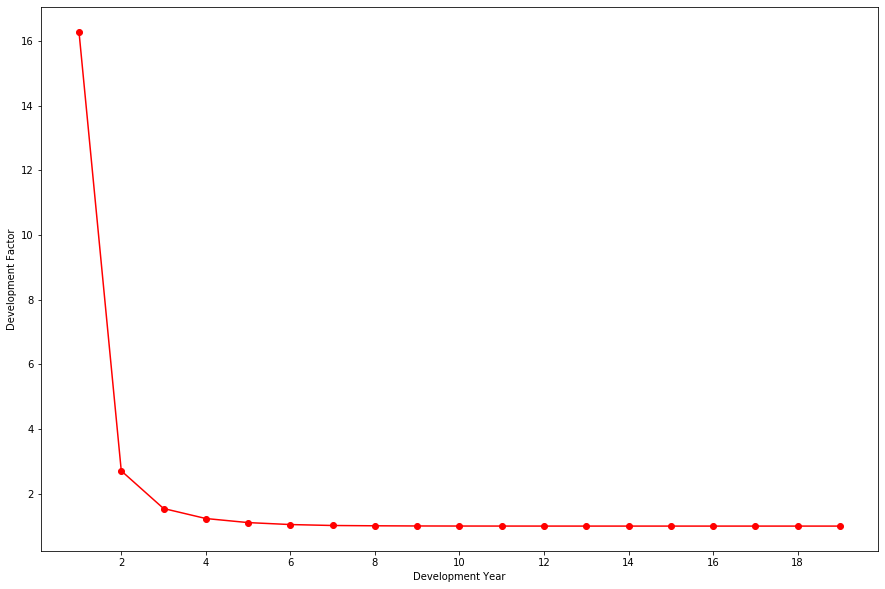

In [25]:
ax = plt.figure(figsize=[15,10]).gca()
plt.plot(range(1,(N_dev)),developmentFactors,'ro',range(1,(N_dev)),developmentFactors,'r-')
plt.xlabel('Development Year')
plt.ylabel('Development Factor')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

<br>

## 2.3 Completion of the triangle <a name="two-three"></a>

- By multiplying with the different development factors, we can complete the cumulative payments triangle in our example. <br> <br>

- The **unobserved** cumulative payments are now obtained by the use of the link ratios. More generally, we obtain

$$\begin{equation*} \hat{C}_{i,j} = (\hat{\lambda}_{n-i} \ldots \hat{\lambda}_{j-1} ) C_{i,n-i} \ \ \ \ \text{      for } \ \ i+j>n. \end{equation*}$$
<br>

In [26]:
# Projection of the complete cumulative triangle
S1Paid_full = S1Paid_triangle.copy()

for i in range(1,N_acc):
    for k in range(N_dev-i,N_dev):
        S1Paid_full.iloc[i,k] = S1Paid_full.iloc[i,k-1]*developmentFactors[k-1]
        
round(S1Paid_full,0)

Paid                                                     \
Dev          1           2            3            4            5    
Acc                                                                  
1998  3119574.0  47184563.0  129571818.0  205210185.0  250488154.0   
1999  2611938.0  48712676.0  128109553.0  199696111.0  251226483.0   
2000  3660623.0  48578158.0  131138360.0  203536066.0  248153147.0   
2001  1969019.0  46814727.0  129874801.0  200157921.0  249622859.0   
2002  4136072.0  51272019.0  133205433.0  207331606.0  250449602.0   
2003  3592737.0  49380700.0  135461144.0  203766029.0  249377437.0   
2004  1617625.0  52367903.0  127123345.0  197583449.0  243772955.0   
2005  1617463.0  54874170.0  127918577.0  199922166.0  247481150.0   
2006  4056397.0  46620968.0  128762059.0  199871502.0  246708416.0   
2007  2094358.0  46397031.0  132602794.0  199503974.0  250744434.0   
2008  3204310.0  39314302.0  127133116.0  195618362.0  242022989.0   
2009  2281020.0  48134704.0  129443792.0  207226593.0  253528126.0   
2010  3247383.0  45355418.0  130948545.0  197259488.0  245848248.0   
2011  4023190.0  52422934.0  135085441.0  213929806.0  262775639.0   
2012  4058287.0  50069534.0  142260025.0  206867581.0  257968282.0   
2013  3335156.0  52570292.0  133763178.0  206994774.0  254275027.0   
2014  1727421.0  48142658.0  129925423.0  202030672.0  249353176.0   
2015  2707623.0  44076323.0  130639869.0  201695830.0  248939903.0   
2016  3057485.0  41569188.0  112607888.0  173856125.0  214579186.0   
2017  2458100.0  40029363.0  108436614.0  167416066.0  206630643.0   

                                                                       \
Dev            6            7            8            9            10   
Acc                                                                     
1998  276516578.0  289448982.0  294634712.0  296987563.0  298408518.0   
1999  278089709.0  289787024.0  296221318.0  298266730.0  300175319.0   
2000  275513570.0  290183175.0  294503166.0  297416709.0  298048416.0   
2001  277553530.0  291323882.0  296885103.0  299858417.0  300647979.0   
2002  278628322.0  291498846.0  297631758.0  299684467.0  300737201.0   
2003  279661188.0  292897321.0  298935320.0  301306174.0  302478780.0   
2004  270937790.0  284027624.0  288476178.0  291655828.0  292905426.0   
2005  271736199.0  284764683.0  290172197.0  293216102.0  294050119.0   
2006  274025670.0  288207447.0  292632220.0  295478977.0  296856077.0   
2007  276357306.0  288067869.0  293180137.0  296397535.0  297531722.0   
2008  271386829.0  285957669.0  290641213.0  292650676.0  293443420.0   
2009  275339116.0  289163444.0  294661052.0  298098369.0  299227918.0   
2010  277067336.0  288809927.0  294575540.0  297283989.0  298410453.0   
2011  289531575.0  302093905.0  307647273.0  310475910.0  311652360.0   
2012  283492730.0  296955026.0  302413927.0  305194445.0  306350883.0   
2013  281780897.0  295161902.0  300587840.0  303351569.0  304501024.0   
2014  276326631.0  289448629.0  294769540.0  297479773.0  298606978.0   
2015  275868653.0  288968902.0  294280995.0  296986736.0  298112073.0   
2016  237791009.0  249083055.0  253661929.0  255994202.0  256964211.0   
2017  228982644.0  239856405.0  244265666.0  246511546.0  247445623.0   

                                                                       \
Dev            11           12           13           14           15   
Acc                                                                     
1998  298969208.0  299128356.0  299192093.0  299201869.0  299251875.0   
1999  300640482.0  301104421.0  301215670.0  301215670.0  301215670.0   
2000  298624624.0  298742396.0  298842383.0  298842383.0  298867680.0   
2001  300887259.0  301125373.0  301141469.0  301141469.0  301174692.0   
2002  301370591.0  301559103.0  301564603.0  301599364.0  301741001.0   
2003  303047244.0  303430365.0  303465828.0  303502076.0  303505693.0   
2004  293363320.0  293685400.0  293845884.0  293894154.0  29393

Remark:

* In case we want to start from an existing pandas dataframe, we create by adding the attribute 'copy()'. If we do not perform this step, both dataframes are linked to the same underlying list. Modifications to the data of the copy will not be reflected in the original object.

<br>

## 2.4 Total reserves <a name="two-four"></a>

- The ultimate cost is then given by the estimated cumulative payments at the end of the development pattern: <br> 

$$\begin{equation*} \hat{U}_{i} = \hat{C}_{i,n} = ( \hat{\lambda}_{n-i} \ldots \hat{\lambda}_{n-1} ) \ C_{i,n-i} \ \ \ \ \text{      for } \ \ i=1,\ldots,n. \end{equation*}$$ <br>

In [27]:
Reserves = [0.0]*(N_acc)

for i in range(1,N_acc):
    Reserves[i] = S1Paid_full.iloc[i,N_acc-1] - S1Paid_full.iloc[i,N_acc-1-i]
    
Reserves

[0.0,
 0.0,
 0.0,
 1090.6402593255043,
 17680.165005743504,
 18300.802320361137,
 59033.25783145428,
 77385.93817776442,
 184980.9352543354,
 436633.47156590223,
 943906.9419074059,
 2092063.065777421,
 4794797.1429739,
 10560933.798085451,
 23843579.03610879,
 51205472.36797118,
 97536822.83610517,
 168431128.7244925,
 216221589.04116896,
 245783470.7471269]

In [28]:
TotalReserves = sum(Reserves)

print('The total reserves are equal to ' + str(int(TotalReserves)) + '.')

The total reserves are equal to 822208868.


<br>

* In order to calculate the total reserves on the other samples, we can of course perform the same commands as before by changing the name of the data sample. However, let us define a function with an undefined triangle as input which delivers the ultimate amounts and the total reserves by applying the CL algorithm.

In [29]:
def CL_triangle(triangle):
    
    N_acc = triangle.shape[0]
    N_dev = triangle.shape[1]
    developmentFactors = [0.0]*(N_dev-1)
    Reserves = [0.0]*(N_acc)
    
    # Calculation of the development factors
    for j in range(N_dev-1):
        developmentFactors[j] = sum(triangle.iloc[0:min(N_acc,N_dev-j-1),j+1]) / sum(triangle.iloc[0:min(N_acc,N_dev-j-1),j])

    triangle_full = triangle.copy()

    # Projection of the complete cumulative triangle
    for i in range(1,N_acc):
        for k in range(N_dev-i,N_dev):
            triangle_full.iloc[i,k] = triangle_full.iloc[i,k-1]*developmentFactors[k-1]
    
    # Calculation of the reserves
    for i in range(1,N_acc):
        Reserves[i] = triangle_full.iloc[i,N_acc-1] - triangle_full.iloc[i,N_acc-1-i]
    
    TotalReserves=sum(Reserves)
    return(int(TotalReserves))

<br>

Now that we can calculate the provisions for each sample by CL, we can add them to our table of results from above.

In [30]:
results.at["Sample1","CL"] = CL_triangle(S1Paid_triangle)
results.at["Sample2","CL"] = CL_triangle(S2Paid_triangle)
results.at["Sample3","CL"] = CL_triangle(S3Paid_triangle)
results.at["Sample4","CL"] = CL_triangle(S4Paid_triangle)
results.at["Sample5","CL"] = CL_triangle(S5Paid_triangle)
results

,Observed,CL,GLM,NN
Sample1,905043411,822208868,NaN,NaN
Sample2,1231419704,1307673382,NaN,NaN
Sample3,2136463115,2085358862,NaN,NaN
Sample4,2132886166,3914420114,NaN,NaN
Sample5,2178800120,2335045312,NaN,NaN


We observe that CL does not perform well in estimating the provisions for Sample 4.

<br>

For further developments, we will need the extended aggregated set for each methods, including chain ladder. So that, we define the following function - it will simply return the development factors:

In [31]:
def get_dev_factors(dataset):
        
    triangle = aggregated_to_triangle(aggregate(dataset))
    [N_acc, N_dev] = triangle.shape
    developmentFactors = [0.0]*(N_dev-1)
    for j in range(N_dev-1):
        developmentFactors[j] = sum(triangle.iloc[0:min(N_acc,N_dev-j-1),j+1]) / sum(triangle.iloc[0:min(N_acc,N_dev-j-1),j])

    return(developmentFactors)

dev_factors = get_dev_factors(Sample1)
dev_factors

[16.28467626807316,
 2.708926807842189,
 1.5439071700792506,
 1.2342342571338663,
 1.1081736966305835,
 1.0474872702177647,
 1.0183829211837638,
 1.0091944138230597,
 1.0037891833433576,
 1.0017497930053787,
 1.0008425384973347,
 1.00035879184905,
 1.0000614761927984,
 1.0001405591814327,
 1.0000017041094595,
 1.0000549723566097,
 1.0000036212878713,
 1.0,
 1.0]

The following function will be used to extend the development of the datasets using the chain ladder methods:

In [32]:
def continue_dev_cl(individual_claims_db, dev_factors):
    
    db_list = []
    all_IDs = individual_claims_db["ID"].unique()
    
    # For each unique id
    for id in all_IDs:
        
        # We create a dataframe that will contain only ID, Dev, Acc and Paid columns
        tmp_db = pd.DataFrame(index = list(range(20)), columns=["ID", "Dev", "Acc", "Paid"])
        
        _paid = individual_claims_db.loc[individual_claims_db["ID"] == id,"Paid"].values.tolist()
        _dev = individual_claims_db.loc[individual_claims_db["ID"] == id,"Dev"].values.tolist()
        already_year = [individual_claims_db.loc[individual_claims_db["ID"] == id,"Acc"].values[0]] * 20
        
        already_paid = _paid
        already_dev = _dev
        
        # For each year that have not been fully developed
        for i in range(len(_paid), 20):
            
            # We multiply the last value by the corresponding development factor
            already_paid.append(already_paid[i - 1] * dev_factors[i-1])
            already_dev.append(i + 1)
        
        # We add the data to the dataframe
        tmp_db.at[:, "ID"] = id
        tmp_db.at[tmp_db.index, "Paid"] = already_paid
        tmp_db.at[tmp_db.index, "Dev"] = already_dev
        tmp_db.at[tmp_db.index, "Acc"] = already_year

        # We store these dataframes in the below list
        db_list.append(tmp_db)
            
    # We return the merged data frame
    return(pd.concat(db_list).reset_index(drop = True))

We apply this function to the first sample:

In [33]:
Sample1_cl_extended = continue_dev_cl(Sample1, get_dev_factors(Sample1))

We check that the provisions are the one we want:

In [34]:
sum(compute_provisions(aggregated_to_triangle(aggregate(Sample1_cl_extended, ["Paid"]))))

822208860

Good!

Now, let us extend the datasets using this function (it can take few minutes):

In [35]:
Sample2_cl_extended = continue_dev_cl(Sample2, get_dev_factors(Sample2))
Sample3_cl_extended = continue_dev_cl(Sample3, get_dev_factors(Sample3))
Sample4_cl_extended = continue_dev_cl(Sample4, get_dev_factors(Sample4))
Sample5_cl_extended = continue_dev_cl(Sample5, get_dev_factors(Sample5))

<br> <br>
<br> <br>

# Chapter 3 - Generalized Linear Models <a name="three"></a>

<br>

## 3.1 Introduction <a name="three-one"></a>

* The main drawback of Chain Ladder, as every other deterministic model, is that no information is available about the volatility around the estimation.


* Mack's model defines a semi-stochastic version for which we can compute a mean squared error of the predicted total loss amount obtained from the model. However, no information about the distribution is known.


* Stochastic models enable to obtain a distribution of the provision so that not only the central estimate is known but also quantiles or confidence intervals around this estimate. Most of the stochastic models for claim reserving can be formulated by means of a particular family of generalized linear models.


* The use of a Generalized Linear Model on reserving data gives more flexibility as we can model relationships between the response variable (i.e. the loss amount) and the explanatory variables (i.e. the different dimensions within the claims triangle) other than the Normal distribution.


<br>

## 3.2 Methodology <a name="three-two"></a>

* In order to set up a Generalized Linear Model for reserving data, we consider a model defined as follows:

     1. The observed random variables $Y_{i,j}$ are stochastically independent.

     2. For each accident year $i=1, 2, ..., I$ and development year $j=1, 2, ..., J$:
 
           a. The response variable has a distribution from the EDF family: $Y_{i,j} \sim EDF(\theta_{i,j},\phi_{i,j},a).$
 
           b. $\fbox{$\mathbb{E}[Y_{i,j}] = \alpha_{i} \beta_{j}$}$ for some parameters $\alpha_{i},\beta_{j}>0$.
    
    
* Notice that we will now work with the **incremental** amounts $Y_{i,j}$.

* A very important remark to make here is that the parameters of the model consist of both row and column parameters $\alpha_{i}$ and $\beta_{j}$ respectively, whereas the only parameters contained in the Chain Ladder (or Mack) model are the column parameters, i.e. the so-called development factors. Thanks to this property, we can investigate different dimensions: 

    * The accident year parameters $\alpha_{i}$ reflect changes due to exposure to risk.
    * The development year parameters $\beta_{j}$ enable to take into account the development pattern of the business line.

<br>

## 3.3 GLM on Aggregated Data <a name="three-three"></a>

* We start with a GLM on the aggregated claim data, because in the past this was usually the only information that was available in an insurance company.

* We again aggregate the sample of incremental data by accident and development year. Notice that we already performed this aggregation on the cumulative dataset from which you can find some inspiration.

In [30]:
Sample1_Incr_Aggr = aggregate(Sample1, ["PaidIncr"])
Sample2_Incr_Aggr = aggregate(Sample2, ["PaidIncr"])
Sample3_Incr_Aggr = aggregate(Sample3, ["PaidIncr"])
Sample4_Incr_Aggr = aggregate(Sample4, ["PaidIncr"])
Sample5_Incr_Aggr = aggregate(Sample5, ["PaidIncr"])

Sample1_Incr_Aggr

,Acc,Dev,PaidIncr
0,1998,1,3119574
1,1998,2,44064989
2,1998,3,82387255
3,1998,4,75638367
4,1998,5,45277969
...,...,...,...
205,2015,2,41368700
206,2015,3,86563546
207,2016,1,3057485
208,2016,2,38511703


* We are now ready to build the **GLM model** where we use the **claim amounts as response variable**. The **explanatory variables of the GLM are the accident and development year**. We treat both variables as **a categorical variable** in the model, such that we obtain **a parameter for each accident year** and **a parameter for each development year**. A GLM can be obtained in Python by the package `statsmodels.api`. First we start with stating the formula of the model, where the function `formula.glm` needs the following input components:    

* The first input is the formula itself.

    * We start with the response variable, which in our case equals the incremental claim amounts `Paid`.
    
    * After the symbol `~`, we summarize the explanatory variables `Acc` and `Dev`. In case we do not want to add an intercept to the model, we can add a `0` to the model formula. Furthermore, a numeric variable is automatically treated as a continuous explanatory variable, which means that we will only estimate one parameter explaining the effect on the response variable. In case we want to estimate a parameter for each year, we transform the variable into a categorical category with the `C( )` statement.
    
* A second input is the dataset that you want to use for building the GLM by the `data= ` statement.
    
* In the (optional) parameter `family`, we can specify the distribution that we want to use. Some options are Normal, Gamma and Tweedie. A complete list can be found by the command `statsmodels.api.families` or `sm.families`.

    * For each of the families, a default link function exists in the package. However, in case we want to choose another one, this can be specified between the brackets after the chosen family name. A list of available link functions for a given family, can be obtained by `statsmodels.api.families.family.<familyname>.links` or `sm.families.family.<familyname>.links`. 

In [31]:
S1_formula = sm.formula.glm(formula="PaidIncr ~ 0 + C(Acc) + C(Dev)"
                            ,data=Sample1_Incr_Aggr
                            ,family=sm.families.Gamma(link=sm.families.links.log)
    )


print(S1_formula.family)
print(S1_formula.formula)

PaidIncr ~ 0 + C(Acc) + C(Dev)


* Once we have stated the GLM formula, we can fit the parameter estimates by using the `fit()` attribute. Remember that with the `dir()` function, one can explore the attributes that are available for a specific object. 

In [32]:
S1_model = S1_formula.fit()
print(S1_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               PaidIncr   No. Observations:                  210
Model:                            GLM   Df Residuals:                      171
Model Family:                   Gamma   Df Model:                           38
Link Function:                    log   Scale:                         0.38743
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Tue, 08 Oct 2019   Deviance:                       1089.1
Time:                        10:15:15   Pearson chi2:                     66.3
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
C(Acc)[1998]    14.7140      0.183     80.600   

* In the previous model summary, we can observe a parameter estimate $\hat{\alpha}_i$ for each accident year and a $\hat{\beta}_j$ for each development year. This is an extension of the Chain Ladder algorithm, where we only obtained an estimate (i.e. development factor) for each development year. In our GLM model, we can now obtain an estimation of the paid claim amounts by multiplying both estimates. However, remember that we used the log link in our GLM modelization. Therefore, we have

$$\begin{equation*} \hat{Y}_{i,j} = \text{exp} \bigl(\hat{\alpha}_{i,j} \bigr) \ \text{exp} \bigl( \hat{\beta}_{i,j} \bigr) \ \ \ \ \text{      for } \ \ i,j=1,\ldots,n. \end{equation*}$$


* In order to predict the unobserved cells of the triangle, we multiply the vector of exponentials of $\alpha$ with the vector of exponentials of $\beta$. Remember that the first $\beta$ equals 0.

In [33]:
alpha_S1 = np.matrix(np.exp(S1_model.params[0:20])).transpose()
beta_S1 = np.matrix(np.exp([0]+list(S1_model.params[20:40])))

Predictions_S1 = pd.DataFrame(np.matmul(alpha_S1,beta_S1))
Predictions_S1.astype(int)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2455797,38045835,69894982,60090370,39848655,22676725,11023291,4543241,2274701,975091,427822,220402,84797,14442,35607,254,10356,540,0,0
1,2370199,36719721,67458744,57995879,38459703,21886312,10639067,4384883,2195415,941104,412910,212719,81841,13939,34366,245,9995,521,0,0
2,4933266,76427404,140406748,120711004,80048953,45553559,22143858,9126574,4569476,1958787,859419,442749,170342,29012,71529,511,20804,1085,0,0
3,2046117,31698957,58234969,50065981,33201027,18893750,9184365,3785329,1895231,812424,356452,183634,70651,12033,29667,212,8628,450,0,0
4,3213788,49788816,91468314,78637474,52148083,29675975,14425669,5945528,2976796,1276056,559870,288429,110970,18900,46598,333,13553,707,0,0
5,3010143,46633891,85672319,73654520,48843660,27795523,13511570,5568783,2788168,1195198,524394,270153,103938,17702,43645,312,12694,662,0,0
6,3368675,52188368,95876593,82427376,54661339,31106197,15120909,6232071,3120262,1337556,586853,302330,116318,19811,48844,349,14206,741,0,0
7,3210278,49734430,91368400,78551576,52091120,29643559,14409912,5939034,2973544,1274663,559259,288114,110849,18879,46547,333,13538,706,0,0
8,3101472,48048795,88271675,75889248,50325609,28638858,13921520,5737744,2872763,1231461,540304,278349,107092,18239,44969,321,13079,682,0,0
9,2918460,45213524,83062928,71411165,47355989,26948932,13100037,5399170,2703246,1158795,508422,261924,100772,17163,42316,302,12307,642,0,0


* The total reserves are then calculated by summing the incremental paid amounts for the unobserved accident and development years, i.e. when the calendar year is higher than 2017. We sum the lower triangle without taking into account the diagonal itself (that is why we specify `k=1`).

In [34]:
sum(np.array(Predictions_S1)[::-1][np.triu_indices(20,k=1)])

837806012.7297688

* In a similar fashion, we can of course estimate the different parameters for the 4 other samples as well. With those parameters, we can compute the ultimate amounts and the total provisions. In the code, we use a Gamma distribution to estimate the parameters. However, the user is free to choose another distribution (such as Tweedie) to improve the GLM model. 

In [35]:
def GLM_triangle(dataset,name):
    
    # Formula and fitting of the GLM models
    glm_formula = sm.formula.glm("PaidIncr ~ 0 + C(Acc) + C(Dev)",data=dataset,family=sm.families.Gamma(link=sm.families.links.log))
    glm_model = glm_formula.fit()
    
    # Extracting the parameters
    alpha = np.matrix(np.exp(glm_model.params[0:20])).transpose()
    beta = np.matrix(np.exp([0]+list(glm_model.params[20:40])))
    
    # Calculate the predicted claim amounts and the total reserves
    Predictions = pd.DataFrame(np.matmul(alpha,beta))
    TotalReserves = sum(np.array(Predictions)[::-1][np.triu_indices(20,k=1)])

    print('The total reserves by GLM for ' + str(name) + ' are equal to ' + str(int(TotalReserves)) + '.')

    return(np.int64(TotalReserves))

<br>

## 3.4 GLM on Individual Data <a name="three-four"></a>

* In this section, we explore the GLM procedure on individual data. As this time only the input dataset changes, we will go faster through the process as we already outlined how the modelization occurs. The following code obtains the total reserves for Sample 1 by using the Gamma distribution.

In [36]:
S1_formula = sm.formula.glm("PaidIncr ~ 0 + C(Acc) + C(Dev)",data=Sample1,family=sm.families.Tweedie(link=sm.families.links.log,var_power=1))
S1_model = S1_formula.fit(method="newton",maxiter=50)
alpha_S1 = 300*np.matrix(np.exp(S1_model.params[0:20])).transpose()
beta_S1 = np.matrix(np.exp([0]+list(S1_model.params[20:40])))
Predictions_S1 = pd.DataFrame(np.matmul(alpha_S1,beta_S1))
sum(np.array(Predictions_S1)[::-1][np.triu_indices(20,k=1)])

C:\Users\wlaurent\Desktop\Project\alliance-xcelerate-academy\WLA_individual_claims\venv_py_individual_claims\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


822208868.9121392

* We extract the incremental triangles for each Sample, we will need those data for further analysis:

In [37]:
def GLM_inc_triangle(dataset):
    glm_formula = sm.formula.glm("PaidIncr ~ 0 + C(Acc) + C(Dev)",data=dataset,family=sm.families.Gamma(link=sm.families.links.log))
    glm_model = glm_formula.fit()
    
    # Extracting the parameters
    
    alpha = np.matrix(np.exp(glm_model.params[0:20])).transpose()
    beta = np.matrix(np.exp([0]+list(glm_model.params[20:40])))
    
    # Calculate the predicted claim amounts and the total reserves
    Predictions = np.array(pd.DataFrame(np.matmul(alpha,beta)))
    
    return(Predictions)

Sample1_glm_inc_triangle = GLM_inc_triangle(Sample1)
Sample2_glm_inc_triangle = GLM_inc_triangle(Sample2)
Sample3_glm_inc_triangle = GLM_inc_triangle(Sample3)
Sample4_glm_inc_triangle = GLM_inc_triangle(Sample4)
Sample5_glm_inc_triangle = GLM_inc_triangle(Sample5)

* We can also compute the reserves by using the following function:

In [38]:
def GLM_triangle(dataset,name):
    
    # Formula and fitting of the GLM models
    glm_formula = sm.formula.glm("PaidIncr ~ 0 + C(Acc) + C(Dev)",data=dataset,family=sm.families.Gamma(link=sm.families.links.log))
    glm_model = glm_formula.fit()
    
    # Extracting the parameters
    year_list = dataset.loc[dataset["Dev"] == 1]["Acc"].values
    number_of_claims = np.array([Counter(year_list)[key] for key in sorted(Counter(year_list))])

    
    alpha = np.matrix(number_of_claims * np.exp(glm_model.params[0:20])).transpose()
    beta = np.matrix(np.exp([0]+list(glm_model.params[20:40])))
    
    # Calculate the predicted claim amounts and the total reserves
    Predictions = pd.DataFrame(np.matmul(alpha,beta))
    
    TotalReserves = sum(np.array(Predictions)[::-1][np.triu_indices(20,k=1)])

    print('The total reserves by GLM for ' + str(name) + ' are equal to ' + str(int(TotalReserves)) + '.')

GLM_triangle(Sample1,"Sample 1")
GLM_triangle(Sample2,"Sample 2")   
GLM_triangle(Sample3,"Sample 3")   
GLM_triangle(Sample4,"Sample 4")   
GLM_triangle(Sample5,"Sample 5") 

The total reserves by GLM for Sample 1 are equal to 837798506.
The total reserves by GLM for Sample 2 are equal to 1306245329.
The total reserves by GLM for Sample 3 are equal to 2089589570.
The total reserves by GLM for Sample 4 are equal to 3526722806.
The total reserves by GLM for Sample 5 are equal to 2269620520.


<br>

For further developments, we will need to extend the developments for individual using the GLM methods. We will achieve it using the following function:

In [39]:
def continue_dev_glm(individual_claims_db, glm_inc_triangle):
    
    db_list = []
    all_IDs = individual_claims_db["ID"].unique()
    
    # For each unique id
    for id in all_IDs:

        # We create a dataframe that will contain only ID, Dev, Acc and Paid columns
        tmp_db = pd.DataFrame(index = list(range(20)), columns=["ID", "Dev", "Acc", "Paid"])
        
        _paid = individual_claims_db.loc[individual_claims_db["ID"] == id,"Paid"].values.tolist()
        _dev = individual_claims_db.loc[individual_claims_db["ID"] == id,"Dev"].values.tolist()
        already_year = [individual_claims_db.loc[individual_claims_db["ID"] == id,"Acc"].values[0]] * 20
        
        already_paid = _paid
        already_dev = _dev
        
        # For each year that have not been fully developed
        inc_line = glm_inc_triangle[20 - len(already_paid)]
        
        for i in range(len(_paid), 20):
            
            # We add the incremental payment to the Paid column
            # This incremental payment is the one we optained using GLM
            already_paid.append(already_paid[i - 1] + inc_line[i])
            already_dev.append(i + 1)
        
        # We add the data to the dataframe
        tmp_db.at[:, "ID"] = id
        tmp_db.at[tmp_db.index, "Paid"] = already_paid
        tmp_db.at[tmp_db.index, "Dev"] = already_dev
        tmp_db.at[tmp_db.index, "Acc"] = already_year

        # We store these dataframes in the below list
        db_list.append(tmp_db)
            
    # We return the merged data frame
    return(pd.concat(db_list).reset_index(drop = True))

We apply the function on the first sample:

In [40]:
Sample1_glm_extended = continue_dev_glm(Sample1, Sample1_glm_inc_triangle)

We check the reserve:

In [41]:
sum(compute_provisions(aggregated_to_triangle(aggregate(Sample1_glm_extended, ["Paid"]))))

837798499

We apply the function for the other samples:

In [42]:
Sample2_glm_extended = continue_dev_glm(Sample2, Sample2_glm_inc_triangle)
Sample3_glm_extended = continue_dev_glm(Sample3, Sample3_glm_inc_triangle)
Sample4_glm_extended = continue_dev_glm(Sample4, Sample4_glm_inc_triangle)
Sample5_glm_extended = continue_dev_glm(Sample5, Sample5_glm_inc_triangle)

As result, we have:

In [43]:
results.at["Sample1", "GLM"] = sum(compute_provisions(aggregated_to_triangle(aggregate(Sample1_glm_extended, "Paid"))))
results.at["Sample2", "GLM"] = sum(compute_provisions(aggregated_to_triangle(aggregate(Sample2_glm_extended, "Paid"))))
results.at["Sample3", "GLM"] = sum(compute_provisions(aggregated_to_triangle(aggregate(Sample3_glm_extended, "Paid"))))
results.at["Sample4", "GLM"] = sum(compute_provisions(aggregated_to_triangle(aggregate(Sample4_glm_extended, "Paid"))))
results.at["Sample5", "GLM"] = sum(compute_provisions(aggregated_to_triangle(aggregate(Sample5_glm_extended, "Paid"))))
results

,Observed,CL,GLM,NN
Sample1,905043411,822208868,837798499,NaN
Sample2,1231419704,1307673382,1306245319,NaN
Sample3,2136463115,2085358862,2089589563,NaN
Sample4,2132886166,3914420114,3526722797,NaN
Sample5,2178800120,2335045312,2269620511,NaN


**Conclusion:** GLM results are better than CL results in general. We still have a huge gap for Sample 4 provisions.


<br> <br>
<br> <br>


# Chapter 4 - Neural Networks on Individual Claims Data <a name="four"></a>

Depending on the sample we are working on, **the chain ladder hypothesis will be disrespected**, i.e. the development pattern is not stable over time. In the previous chapter, we showed that we can use the GLM models to provide a better estimation for the paid claim amounts. In this chapter, we investigate if neural networks (and other data science models) can be used to replace the GLM and obtain a better fit. Using neural networks, we are assuming the following benefits and drawbacks:

Pros neural networks:

- Can learn non-linear and complex relationships
- Can infer unseen relationships on unseen data as well

However, the neural networks admit several drawbacks:

- High needs in terms of running time
- High needs in terms of data
- Generally, neural networks suffer from overfitting

In this chapter, we will first outline the methodology that we applied on our reserving triangles by using data science. Then, we will give a recap of some neural network attributes. We will declare a classical machine learning process and we will optimize our models in order to improve our results. **The aim of this chapter is to predict the cumulated paid claim amounts by using neural networks**.

<br>

## 4.1 Method  <a name="four-one"></a>

The method we will use in this training consists of creating a new model for each development year:

* To predict the development year 2, we only use the development year 1.
* To predict the development year 3, we only use the development years 1 and 2.
* ...
* To predict the development year $n$, we use the development years $1, 2, ..., n-1$.

<center><img src="images/model_dev_year_1_v2.png" width="900"></center>

Afterwards, we have: 

<center><img src="images/model_dev_year_n_v2.png" width="900"></center>

We increment this process until the last column is predicted.

In order to build the neural networks, we will need to extract the red rectangles above. For the development year $(n)$ we need claims that are developed until $(n)$. We then create a function that takes as input the dataset and the development (between 1 and 20) and that returns the extracted cumulative payments. We create a, `extract_n_dev` function that achieves this task:

In [39]:
def extract_n_dev(individual_claims_db, dev, variable = "Paid"):
    # We take only the claims that are developed enough
    developped_sample = individual_claims_db.loc[individual_claims_db["Dev"] <= dev]
    
    # We count IDs, the underlying idea is that if there's 19 rows that admit the same ID, then dev = 19
    tmp = Counter(developped_sample.loc[:, "ID"]).most_common()
    tmp = [_tmp[0] for _tmp in tmp if _tmp[1] == dev]
    
    # We take this sample using isin function
    interesting_sample = developped_sample.loc[developped_sample["ID"].isin(tmp)]
    
    sample_list = []
    
    # We extract per development year, we sort by ID, and we add it to our sample_list
    for i in range(1, dev + 1):
        tmp_sample = interesting_sample.loc[interesting_sample["Dev"] == i]
        tmp_sample = tmp_sample.sort_values("ID")
        tmp_sample = tmp_sample.loc[:, variable].values
        sample_list.append(tmp_sample)
    
    # We pre-format the output for further applications
    if(dev > 2):
    
        return(np.array(sample_list[0:(dev-1)]).transpose(), sample_list[dev - 1])
    
    if(dev == 2):
        
        return(np.array(sample_list[0]).reshape(-1, 1), sample_list[1])

Note that we added a `variable` argument in order to choose the variable we want to work with. We use this function to extract the two first development years in order to predict the third one:

In [40]:
X, y = extract_n_dev(individual_claims_db=Sample1, dev=3)
print(X[:5], y[:5])

[[ 19813  77470]
 [  3631  97483]
 [   119 290900]
 [   438  65575]
 [  2662  97096]] [398261 802160 290900 522670 494645]


$X$ contains the cumulated payments for the two first development years, and $y$ contains the third one. **For this development year, all we have to do now is to learn $y$ in function of $X$**.

<br>

## 4.2 Introduction to neural networks  <a name="four-two"></a> 

We will use the *sklearn* library and its high-level `MLPRegressor` neural network function. Another widely known library for neural networks is *tensorflow*. *tensorflow* is a library from Google, of which the development started in 2011. More information about this library can be found [here](https://www.tensorflow.org/).

<br>

### 4.2.1 Neural Networks brick: the neuron  <a name="four-two-one"></a> 

The first brick is the neuron. Below, you will find a simple neuron that admits two inputs. The two inputs will go through the neurone and will be modified by the activation function $f$:
<center><img src="images/a_neurone.PNG" width="800"></center>

Where:
* $x_1$, $x_2$ the input values;
* $w_1$, $w_2$ the associated weights;
* $b$ a constant;
* $f$ an activation function (see below);
* $y$ the output.

Here, we would have:

$$y=f(x_1 * w_1 + x_2 * w_2 + b).$$

<br>

### 4.2.2 Activation function  <a name="four-two-two"></a>

There exist many activation functions, the most common ones are stated below:

<center><img src="images/sigmoids.png" width="800"></center>

The related `MLPRegressor` argument linked to the activation function is the `activate` argument. We list here the possible values including some remarks on those functions.
* `identity`: $f(x) = x$
    * Identity is scale-invariant - scaling the data will have no effect on the learning.
* `logistic` which is the sigmoid function
    * We use the sigmoid function in practice to compute the probability or anything that is located between 0 and 1.
* `tanh`
    * Mainly used for classification between two classes.
    
* `relu` which is the ReLU function
    * relu is scale-invariant for inputs that are only positive.

**As the activation functions work ideally with values between $-1$ and $1$, it is more than advised to scale the data before fitting any neural networks!**

We will scale the data using the `MinMaxScaler` provided by **sklearn** framework. It scales the data as follows:

$$X_{i, scaled} = \frac{X_i - min(X)}{max(X) - min(X)}$$

Where:

* $X$ is a length-$n$ numerical vector, $X_i, i \in \{1, 2, ...,n\}$ it's elements
* $min(X)$ X's minimum value
* $max(X)$ X's maximum value

We have the property that if $\forall i \in \{1, 2,...,n\}, X_i > 0$, then $X_{i, scaled} \in [0,1]$

<br>

### 4.2.3 The global neural network structure  <a name="four-two-three"></a>

We will limit ourselves to the Multiple Layer Perceptron (MLP) as a neural network graph. An example of an MLP can be found below: 

<center><img src="images/mlp_example_3.png" width="900"></center>


(This MLP is also an SLP or Single Layer Perceptron because SLPs only possess 1 hidden layer)

Its aim is to learn / predict the development year 3 depending on the development years 1 and 2. 

To implement it using *sklearn*, we do:

In [90]:
nn = MLPRegressor(hidden_layer_sizes=(1,))

Note that the `hidden_layer_sizes` argument represents the hidden layers. For instance:

* `(1,1,)` means two hidden layers that contain 1 neuron.
* `(1,5,)` means one hidden layer that contains 1 neuron and one hidden layer that contains 5 neurons.
* etc.

Then, we fit it using the `fit` function argument:

In [42]:
nn.fit(X, y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(1,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

<br>

Neural networks can also return multiple outputs at each run. In our case, we will add the outstanding claim amounts to our model in order to enhance the prediction of the payments because of the high correlation between them. **Only by using neural networks that predict two variables at the same time, we can capture the correlation structure between them**. As stated as follows, we will predict the third year using such networks:

<center><img src="images/two_outputs_nn.png" width="800"></center>

As confirmed in the ASTIN report, the more we will have as an input, the more neurons we will have in our models. For low development years, we have 1 layer and a small amount of neurons, and for the last development year we can go further by using multiple layers and many neurons.

<br>

### 4.2.4 Other hyper parameters  <a name="four-two-four"></a>

You can reach the `MLPRegressor` official documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). Some arguments of the function are the following:

* `max_iter`: the maximum number of iterations;
* `verbose`: do we print what happens during the learning?
* `warm_start`: do we re-train the model?
* `alpha`: a parameter linked to the numerical optimization (L2 penalty (regularization term))
* `n_iter_no_change`: the maximum number of iterations to respect where the loss function is not decreasing by at least `tol`. If not respected, we stop the process. In order to have a deeper learning, we will fix `n_iter_no_change = 100`.
* `learning_rate_init`: the initial learning rate value
* etc.

By using the `help` function, you can assess the documentation:

In [43]:
help(MLPRegressor)

Help on class MLPRegressor in module sklearn.neural_network.multilayer_perceptron:

class MLPRegressor(BaseMultilayerPerceptron, sklearn.base.RegressorMixin)
 |  MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)
 |  
 |  Multi-layer Perceptron regressor.
 |  
 |  This model optimizes the squared-loss using LBFGS or stochastic gradient
 |  descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity', 'logistic', 'tanh', 'relu'

<br>

### 4.2.5 Modelization function  <a name="four-two-five"></a>

Then we create a function that wraps `extract_n_dev` and `MLPRegressor`. We will include it into the overall process:

In [44]:
def build_n_mlp(
    individual_claims_db
    , dev
    , use_outstanding = True
    , **kwarg):
    
    X_1, y_1 = extract_n_dev(individual_claims_db, dev, "Paid")
    
    # If we use the outstanding variable, our networks will have 2 times more variables as input and 2 variables as output.
    # It needs to be taken into account. The MLPRegressor function will understand how much output we want.
    # Depending on the shape of the response variable that we use in order to fit it.
    if(use_outstanding):
        X_2, y_2 = extract_n_dev(individual_claims_db, dev, "Outstanding")
        X = np.concatenate((X_1,X_2), axis = 1)
        y = np.concatenate([y_1.reshape(-1,1), y_2.reshape(-1,1)], axis = 1)
    else:
        X = X_1
        y = y_1
    
    MLP = MLPRegressor(**kwarg)
    
    # We declare the input scaler and the output scaler
    X_scaler = MinMaxScaler()
    y_scaler = MinMaxScaler()
    
    # We apply the scaling
    X_scaled = X_scaler.fit_transform(X)

    # We scale the response variable
    if len(y.shape) == 1:
        y_scaled = y_scaler.fit_transform(y.reshape(-1, 1))
    else:
        y_scaled = y_scaler.fit_transform(y)
    
    # We fit
    MLP.fit(X_scaled, y_scaled)
    return(MLP, X_scaler, y_scaler)

Note that one of the argument is `**kwarg`. The arguments will be then be passed to the `MLPRegressor` function. That specific syntax is equivalent to the `...` in R.
We added a `use_outstanding` variable. This argument will be used to add the outstandings into our networks.

<br>

## 4.3 Machine learning practices reminder  <a name="four-three"></a> 

In this section, we remind you of the classical machine learning process. We will first split the set into a learning and a testing set. By doing this, we will be able to assess our model performances. In order to achieve it, we will need to define a measure - we choose here the mean squared error. Once the process is clear for one model, we will loop through a tuning grid and compare the models in order to extract the best one.

<br>

### 4.3.1 Cross Validation  <a name="four-three-one"></a> 

There are multiple ways to validate models using cross validation methods (see for more information [here](https://en.wikipedia.org/wiki/Cross-validation_(statistics)). A widely known procedure to validate models is to split the data set into two sets: a training set and a testing set. 

<center><img src="images/train_test_set.png" width="600"></center>

Assume we want to take **70% of our observations to train a model and the other 30% observations to test the trained model**. In order to keep the same allocation by accident year in each of the samples, we will need to split depending on the accident year. We wrote a function to achieve this task:

In [45]:
def create_training_testing(individual_claims_db, learning_prop):
    unique_Acc = sorted(individual_claims_db["Acc"].unique())
    train_ID, test_ID = [],[]
    for acc in unique_Acc:
        
        unique_ID = individual_claims_db.loc[individual_claims_db["Acc"] == acc]["ID"].unique().tolist()
        
        train_ID_to_add, test_ID_to_add = train_test_split(
            unique_ID
            , train_size = learning_prop
            , random_state = 0
        )
        
        train_ID += train_ID_to_add
        test_ID += test_ID_to_add
        
    return(individual_claims_db.loc[individual_claims_db["ID"].isin(train_ID)].sort_index()
            , individual_claims_db.loc[individual_claims_db["ID"].isin(test_ID)].sort_index())

This function is wrapping the `train_test_split` function offered by *sklearn*. This function will achieve a split depending a given proportion (specified by the `train_size` argument).

We chose our parameters:

In [46]:
learning_proportion = 0.7
dev_year = 2
working_sample = Sample1

<br>

Applied to Sample 1, it gives the two sets as a tuple:

In [47]:
train, test = create_training_testing(working_sample, learning_proportion)
print("Observed training proportion :", len(train)/len(working_sample), "Observed testing proportion :", len(test)/len(working_sample))

Observed training proportion : 0.7 Observed testing proportion : 0.3


<br>

Now, we train a model on the training set:

In [48]:
model, X_scaler, y_scaler = build_n_mlp(
    individual_claims_db=train
    , n_iter_no_change= 10
    , dev = dev_year
    , hidden_layer_sizes= (100)
    , activation= 'relu'
    , max_iter=500
    , verbose= True
    , use_outstanding = False
)

Iteration 1, loss = 0.01353663
Iteration 2, loss = 0.00760631
Iteration 3, loss = 0.00717654
Iteration 4, loss = 0.00709082
Iteration 5, loss = 0.00706598
Iteration 6, loss = 0.00704182
Iteration 7, loss = 0.00702496
Iteration 8, loss = 0.00701802
Iteration 9, loss = 0.00700845
Iteration 10, loss = 0.00700928
Iteration 11, loss = 0.00700329
Iteration 12, loss = 0.00700681
Iteration 13, loss = 0.00700851
Iteration 14, loss = 0.00699787
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


We predict using the `predict` function argument once we have split the test set into its inputs and its outputs:

In [49]:
test_input, test_output = extract_n_dev(test, dev_year, "Paid")
prediction = y_scaler.inverse_transform(model.predict(X_scaler.transform(test_input)).reshape(-1,1))[:,0]

A common practice is to display the predicted values in function of the observed ones:

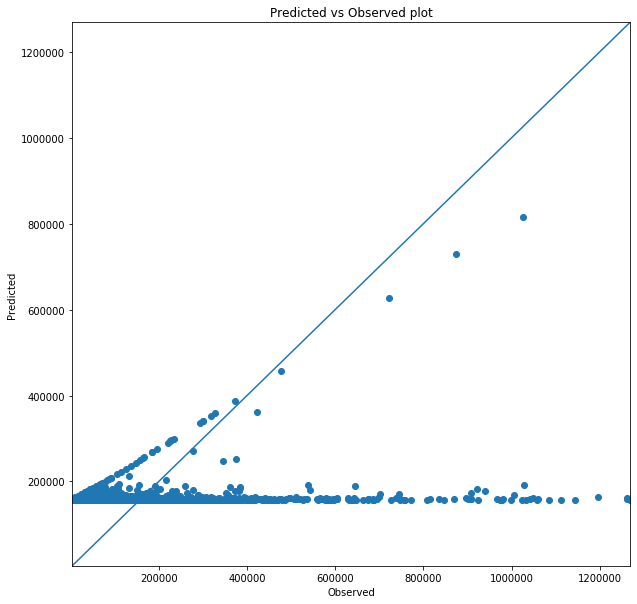

In [50]:
def pred_vs_obs_plot(pred, obs):
    plt.figure(figsize=(10,10))
    plt.scatter(x = obs, y = pred)
    the_min = min(min(pred), min(obs))
    the_max = max(max(pred), max(obs))
    plt.axis([the_min, the_max, the_min, the_max])
    plt.xlabel("Observed"); plt.ylabel("Predicted"); plt.title("Predicted vs Observed plot")
    plt.plot([the_min,the_max], [the_min, the_max])
    plt.show()

pred_vs_obs_plot(prediction, test_output)

Of course, we can do the same graph for the learning sample in order to inspect whether we learnt well or not:

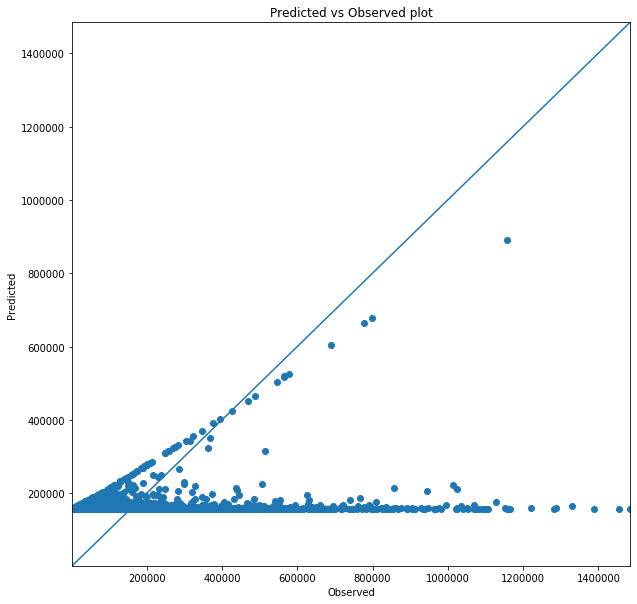

In [51]:
train_input, train_output = extract_n_dev(train, dev_year, "Paid")
prediction = y_scaler.inverse_transform(model.predict(X_scaler.transform(train_input)).reshape(-1,1))

pred_vs_obs_plot(prediction, train_output)

The closer the points are to the first bisectrix of the plane, the better the accuracy of the predictions.

In order to better understand what happens, we print a scatter plot of the payments `Paid` for the second development year in function of the first development year: 

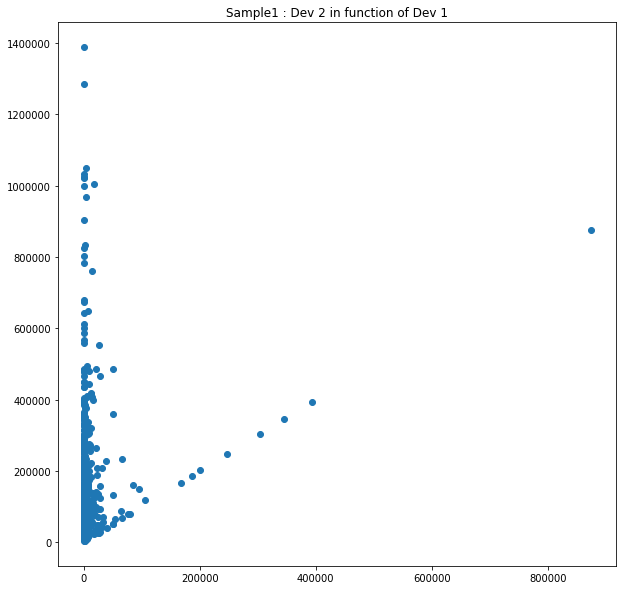

In [52]:
plt.figure(figsize = [10,10])
plt.scatter(x = Sample1.loc[Sample1["Dev"] == 1]["Paid"][0:600], y = Sample1.loc[Sample1["Dev"] == 2]["Paid"][0:600])
plt.title("Sample1 : Dev 2 in function of Dev 1")
plt.show()

<br>

<hr>
<center> <h4>  - Exercise  -  <h4/>  </center>
    
By observing the previous plot, we know that working with the payments only is not enough. Even if we have many values, those weigths in 0 are not predictable. We need more information to add to our model, which we **find in the outstanding claim amounts**.

In order to "create a feeling", we invite you to fit the neural networks and to find, for which development year, a parameter can be better than another one.

We have a first set of parameters, **directly linked to the data**:

* The development year `dev_year`
* The sample you are working with `Sample`
* The train/test proportion `train_proportion`

In [53]:
dev_year = 2
Sample = Sample1
train_proportion = 0.7

train, test = create_training_testing(Sample, train_proportion)

We have a second set of parameters, **directly linked to the model**:

- `activation`
- `n_iter_no_change`
- `max_iter`
- `hidden_layer_sizes`

In [54]:
model, X_scaler, y_scaler = build_n_mlp(
    individual_claims_db=train
    , n_iter_no_change= 10
    , dev = dev_year
    , hidden_layer_sizes= (100)
    , activation= 'relu'
    , max_iter=500
    , verbose= True
    , use_outstanding = True
)

Iteration 1, loss = 0.05290540
Iteration 2, loss = 0.01369023
Iteration 3, loss = 0.00685855
Iteration 4, loss = 0.00672923
Iteration 5, loss = 0.00655640
Iteration 6, loss = 0.00648142
Iteration 7, loss = 0.00644200
Iteration 8, loss = 0.00642889
Iteration 9, loss = 0.00641899
Iteration 10, loss = 0.00641720
Iteration 11, loss = 0.00641710
Iteration 12, loss = 0.00641158
Iteration 13, loss = 0.00641210
Iteration 14, loss = 0.00640931
Iteration 15, loss = 0.00640774
Iteration 16, loss = 0.00641136
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


Then, we prepare the data in order to graph the predicted vs observed scatter plot:

In [55]:
# As shown earlier, we need to merge the Paid and Outstanding variables in order to include both of them in the 
# modelization
test_input_1, test_output_1 = extract_n_dev(test, dev_year, "Paid")
test_input_2, test_output_2 = extract_n_dev(test, dev_year, "Outstanding")
X = np.concatenate((test_input_1,test_input_2), axis = 1)
y = np.concatenate([test_output_1.reshape(-1,1), test_output_2.reshape(-1,1)], axis = 1)

We predict:

In [56]:
prediction = y_scaler.inverse_transform(model.predict(X_scaler.transform(X)))

We keep only the `Paid` column:

In [57]:
prediction = prediction[:,0]

We do the same for the testing set outputs:

In [58]:
y = y[:,0]

<br>

**We perform predicted versus observed plot for both training and testing set in order to appreciate the calibrations**

<u>On the testing set:</u>

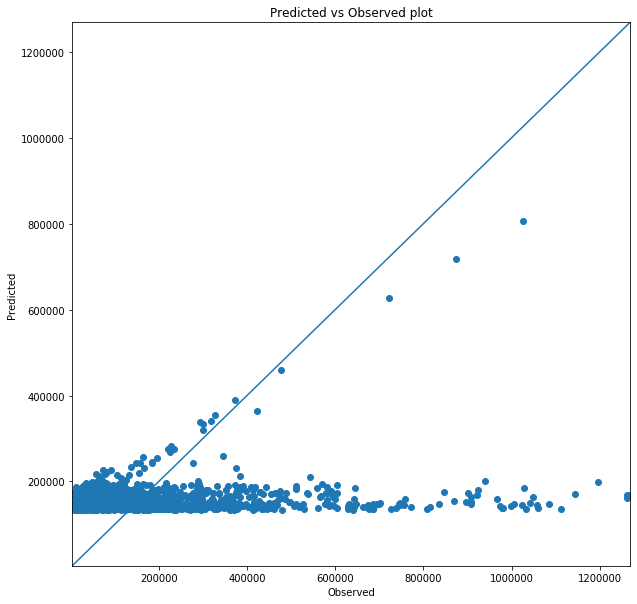

In [59]:
pred_vs_obs_plot(prediction, y)

<u>On the training set:</u>

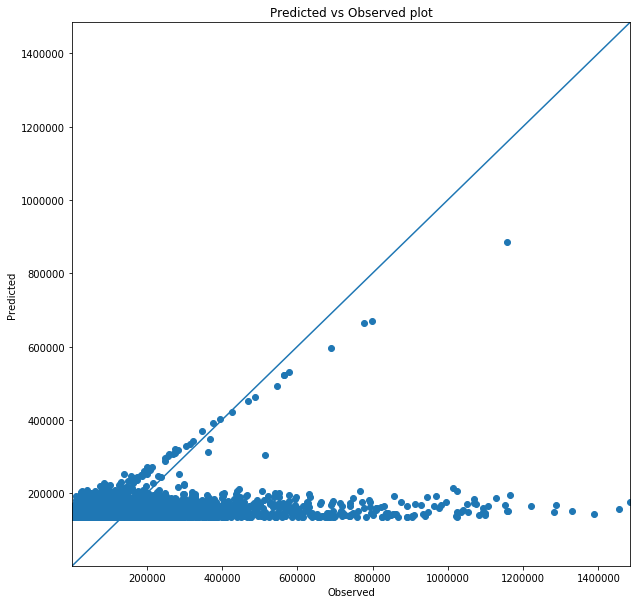

In [60]:
train_input_1, train_output_1 = extract_n_dev(train, dev_year, "Paid")
train_input_2, train_output_2 = extract_n_dev(train, dev_year, "Outstanding")

X_train = np.concatenate((train_input_1,train_input_2), axis = 1)
y_train = np.concatenate([train_output_1.reshape(-1,1), train_output_2.reshape(-1,1)], axis = 1)
prediction = y_scaler.inverse_transform(model.predict(X_scaler.transform(X_train)))
prediction = [tmp[0] for tmp in prediction]
y_train = [tmp[0] for tmp in y_train]

pred_vs_obs_plot(prediction, y_train)

<hr>

<br>

### 4.3.2 MSE - Assess the performances <a name="four-three-two"></a>

The Mean Squared Error or MSE is the average of the squared differences between the prediction and the reality. Assuming $X$ and $Y$ are two vectors of the same length, we have:

$$MSE(X,Y) = \frac{1}{n} \sum_{i\in{1,...,n}}(X_i-Y_i)^2$$

Where:

* $n$ is the length of $X$ or $Y$
* $X_i$, $Y_i$ the $i^{th}$ value of $X$, $Y$.

This measure is used in practice to compute how far our predictions are from the reality. Therefore, the lower the MSE, the better our predictions will be. We declare a `mse` function as follows:

In [61]:
def mse(x,y):
    return sum((np.array(x) - np.array(y))**2)/len(x)

Then, we can use it to compute the MSE between our observations and the prediction:

In [62]:
mse(prediction, y_train)

30532675785.577797

**Note that the value of the MSE has not that much interest in itself, our aim is only to reduce it. This is the aim of the next part.**

<br>

### 4.3.3 Tuning grids <a name="four-three-three"></a>

Let us consider that the underlying hyperparameters of our model are mathematically denoted by $hp_1$, $hp_2$, ..., $hp_p$. Then the best hyperparameters are the ones that verify the following:

$$\fbox{$argmin_{hp_1, hp_2, ..., hp_p}(mse(f(X, y, hp_1, hp_2, ..., hp_p), observed\_values))$}.$$

<br>

The tuning grid consists of creating a hyperparameters space where we will run the model on each point in order to find the best combination:

In [63]:
param_grid = {'hidden_layer_sizes': [(55,), (60,), (65),],
              'activation': ['relu',],
              'learning_rate_init': [0.1, 0.5, 0.05 ,0.01, 0.005, 0.001],
              'max_iter' : [500],
              "n_iter_no_change" : [40, 50, 60],
              "learning_rate" : ["constant", "invscaling", "adaptive"]
             }

This parameters grid admits the following number of combinations:

In [64]:
np.prod([len(tmp) for tmp in param_grid.values()])

162

<br>

Before industrializing the process, we create two functions we will use to prepare our data.

* `prepare_train_data` aims is to extract the right part of the triangle, to scale, and to return the scalers
* `prepare_test_data` will extract the right part of the triangle, and will use the `prepare_train_data` scalers to scale the data.

In [65]:
def prepare_train_data(individual_claims_db, dev, use_outstanding = True):
    
    X_1, y_1 = extract_n_dev(individual_claims_db, dev, "Paid")

    if(use_outstanding):
        X_2, y_2 = extract_n_dev(individual_claims_db, dev, "Outstanding")
        X = np.concatenate((X_1,X_2), axis = 1)
        y = np.concatenate([y_1.reshape(-1,1), y_2.reshape(-1,1)], axis = 1)
        
    else:
        X, y = X_1, y_1
        y = y_1
    
    # We declare the input scaler and the output scaler
    X_scaler, y_scaler = MinMaxScaler(), MinMaxScaler()
    
    # We apply the scaling
    X_scaled = X_scaler.fit_transform(X)

    # We scale the response variable
    if len(y.shape) == 1:
        y_scaled = y_scaler.fit_transform(y.reshape(-1, 1))
    else:
        y_scaled = y_scaler.fit_transform(y)
        
    return(X_scaled, y_scaled, X_scaler, y_scaler)

In [66]:
def prepare_test_data(individual_claims_db, dev, X_scaler, y_scaler, use_outstanding = True):
    
    X_1, y_1 = extract_n_dev(individual_claims_db, dev, "Paid")

    if(use_outstanding):
        X_2, y_2 = extract_n_dev(individual_claims_db, dev, "Outstanding")
        X = np.concatenate((X_1,X_2), axis = 1)
        y = np.concatenate([y_1.reshape(-1,1), y_2.reshape(-1,1)], axis = 1)
    else:
        X, y = X_1, y_1
    
    # We apply the scaling
    X_scaled = X_scaler.transform(X)
    # We scale the response variable
    if len(y.shape) == 1:
        y_scaled = y_scaler.transform(y.reshape(-1, 1))
    else:
        y_scaled = y_scaler.transform(y)
        
    return(X_scaled, y_scaled)

<br>

We apply the functions, we have:

In [67]:
Sample1_tr, Sample1_ts = create_training_testing(Sample1, 0.7)
X_tr, y_tr, X_scaler, y_scaler = prepare_train_data(Sample1_tr, 2)
X_ts, y_ts = prepare_test_data(Sample1_ts, 2, X_scaler, y_scaler)

<br>

We will concatenate the training and testing data. We will need to specify which part is comming from the training set and which part is comming from the test set. The index will be wrapped in `PredefinedSplit` function. It will let us a hand on the scaling system.

In [68]:
X, y = np.concatenate([X_tr, X_ts]),  np.concatenate([y_tr, y_ts])
ps = PredefinedSplit(np.append(np.full(X_tr.shape[0], -1, dtype= int),np.full(X_ts.shape[0], 0, dtype= int)))

<br>

We declare the model we will use:

In [69]:
MLP = MLPRegressor( random_state= 0)

<br>

Then, we wrap the model into the `GridSearchCV` function. We have the following parameters:

* `param_grid`: the parameters grid used.
* `cv`: the retained cross-validation. Here we pre-setted the cross validation index.
* `scoring` the scoring function (see [the documentation here](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)). We will use "neg_mean_squared_error" which involves minimising a mean squared error.

In [70]:
grid_search = GridSearchCV(MLP
                           , param_grid = param_grid
                           , cv=ps
                           , scoring="neg_mean_squared_error"
                          )

And, we fit:

In [71]:
grid_search.fit(X, y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             error_score='raise-deprecating',
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_iter=200,
                                    momentum=0.9, n_iter_no_change=10...
             iid='warn', n_jobs=None,
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [(55,), (60,), 65],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'learning_rate_init': [0.1, 0.5, 0.05, 0.01, 0.005,
                            

We can access the modelization parameters using:

In [72]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (55,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 500,
 'n_iter_no_change': 60}

The best model is this one:

In [73]:
grid_search.best_estimator_

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(55,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=500, momentum=0.9,
             n_iter_no_change=60, nesterovs_momentum=True, power_t=0.5,
             random_state=0, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

On the test set, we have:

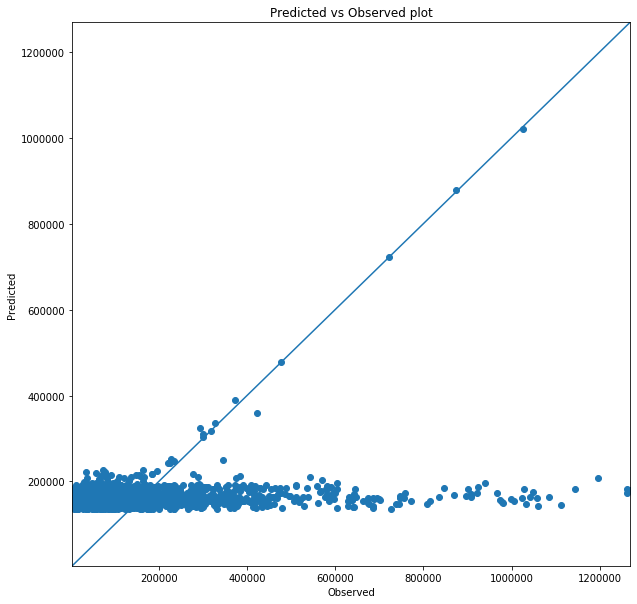

In [74]:
prediction = y_scaler.inverse_transform(grid_search.best_estimator_.predict(X_ts))[:,0]
pred_vs_obs_plot(prediction, y_scaler.inverse_transform(y_ts)[:,0])

On the train set, we have:

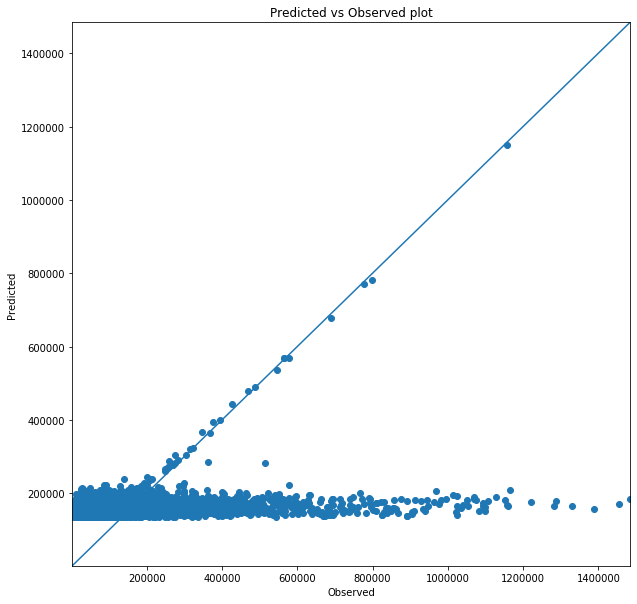

In [75]:
prediction = y_scaler.inverse_transform(grid_search.best_estimator_.predict(X_tr))[:,0]
pred_vs_obs_plot(prediction, y_scaler.inverse_transform(y_tr)[:,0])

<br>

In order to provide you some sets of parameters, we optimized the models over the following tuning grids:

In [76]:
big_param_grid = {'hidden_layer_sizes': [(100,), (300,)],
                  'activation': ['relu',],
                  'learning_rate_init': [0.05 ,0.01, 0.005, 0.001],
                  'max_iter' : [500],
                  "n_iter_no_change" : [100],
                  "learning_rate" : ["adaptive"]
                 }

<br>

Next, we declare a function that will run every model and collect the results:

In [77]:
def optimize_model(train, test, param_grid = big_param_grid):
    
    best_param = []
    
    for dev in range(2, 21):
        
        print("Dev: :", dev)
    
        X_tr, y_tr, X_scaler, y_scaler = prepare_train_data(train, dev)
        X_ts, y_ts = prepare_test_data(test, dev, X_scaler, y_scaler)
        
        X, y = np.concatenate([X_tr, X_ts]),  np.concatenate([y_tr, y_ts])
        
        ps = PredefinedSplit(np.append(np.full(X_tr.shape[0], -1, dtype= int),np.full(X_ts.shape[0], 0, dtype= int)))
        
        MLP = MLPRegressor(random_state= 0)
        
        grid_search = GridSearchCV(MLP
                           , param_grid = param_grid
                           , cv=ps
                           , scoring="neg_mean_squared_error"
                          )
        
        grid_search.fit(X, y)
        
        best_param.append(grid_search.best_params_)
        
    return(best_param)

<br>

Due to some time constraints, we already ran this function on each of the samples and we stored the parameters in a dictionary. (We used the `update` argument function in order to add elements to a dictionary.):

In [78]:
# best_models = dict()

# train, test = create_training_testing(Sample1, 0.7)
# best_models.update({"Sample1" : optimize_model(train, test, big_param_grid)})

# train, test = create_training_testing(Sample2, 0.7)
# best_models.update({"Sample2" : optimize_model(train, test, big_param_grid)})

# train, test = create_training_testing(Sample3, 0.7)
# best_models.update({"Sample3" : optimize_model(train, test, big_param_grid)})

# train, test = create_training_testing(Sample4, 0.7)
# best_models.update({"Sample4" : optimize_model(train, test, big_param_grid)})

# train, test = create_training_testing(Sample5, 0.7)
# best_models.update({"Sample5" : optimize_model(train, test, big_param_grid)})

For instance, our optimization for Sample1 gave us:

In [80]:
# best_models["Sample1"]

Please note that this process is **time consuming**. Hence, we propose you to load the parameters sets for all the samples using the *pickle* library. We saved the parameters using the `dump` *pickle* function:

In [ ]:
# pickle.dump(best_models, open(os.path.join(data_folder_path, 'param_list.pickle'), 'wb'))

<br>

### 4.3.4 Building the final models <a name="four-one"></a>

Then, we apply our best neural-network on the full dataset. We first need to load the parameters lists using *pickle* library and its `load` function:

In [81]:
best_models = pickle.load(open(os.path.join(data_folder_path, 'param_list.pickle'), 'rb'))

We define a function that will train the models using the backupped parameters list:

In [82]:
def build_n_mlp_list(
    individual_claims_db
    , param_list = []
):
    models = []
    for dev in range(2, 21):
    
        print("Dev :", dev)
        
        tmp_param = param_list[dev - 2]
        new_model, new_X_scal, new_y_scal = build_n_mlp(
            individual_claims_db=individual_claims_db
            , dev=dev
            , verbose= False
            , **tmp_param
        )
        models.append([new_model, new_X_scal, new_y_scal])
    return models

Note that we called the dictionary `tmp_param` with two `*` before. This way, the `build_n_mlp` function will take as argument the dictionary keys and as values the dictionary values.

For instance:

```
my_dict = {"param_1": 1, "param_2": 2}
f(**my_dict)
```
Then, `f(**my_dict)` will be understood as:
```
f(param_1 = 1, param_2 = 2)
```


We add a model list for each sample:

In [83]:
# models = dict()
# models.update({"Sample1": build_n_mlp_list(individual_claims_db=Sample1, param_list= best_models["Sample1"])})
# models.update({"Sample2": build_n_mlp_list(individual_claims_db=Sample2, param_list= best_models["Sample2"])})
# models.update({"Sample3": build_n_mlp_list(individual_claims_db=Sample3, param_list= best_models["Sample3"])})
# models.update({"Sample4": build_n_mlp_list(individual_claims_db=Sample4, param_list= best_models["Sample4"])})
# models.update({"Sample5": build_n_mlp_list(individual_claims_db=Sample5, param_list= best_models["Sample5"])})

We exported the models using the `dump` *pickle* function:

In [84]:
# pickle.dump(models, open(os.path.join(data_folder_path, 'model_list.pickle'), 'wb'))

<br>

## 4.4 Applying neural networks  <a name="four-four"></a> 

In the previous section, our models were trained and the results were stored. We can now load them by using the following command line:

In [85]:
models = pickle.load(file=open(os.path.join(data_folder_path, 'model_list.pickle'), 'rb'))

<br>

Now that we have all the models, we can build a function that predicts, for each model list, the payments and the outstanding claim amounts simultaneously:

In [86]:
def continue_dev(already_paid, already_outstanded,model_list):
    
    for i in range(len(already_paid) +1 , 21):
        
        [tmp_model, tmp_X_scal, tmp_y_scal] = model_list[i-2]
        
        tmp_X = np.concatenate((already_paid, already_outstanded)).reshape(1, -1)
        
        tmp_X_scaled = tmp_X_scal.transform(tmp_X)
        
        tmp_predicted = tmp_y_scal.inverse_transform(tmp_model.predict(tmp_X_scaled))[0]
        
        already_paid.append(tmp_predicted[0])
        
        already_outstanded.append(tmp_predicted[1])

    return(already_paid, already_outstanded)

<br>

Assuming a claim that starts at a payment of $10000$ for the first year and has an outstanding claim amount of $100000$. As prediction, we then have for Sample 1:

In [89]:
continue_dev([10000], [100000], model_list= models["Sample1"])

([10000,
  114773.70090089602,
  313474.0372036121,
  453424.2968161601,
  591431.3999600061,
  630250.7990821461,
  686703.5864112502,
  698218.5321209691,
  703412.722625327,
  713907.8642380963,
  712443.246863387,
  713211.5802400033,
  711685.6053282226,
  715713.7228089639,
  715512.5131481012,
  716664.7570810072,
  712866.0064200616,
  715820.260240773,
  713265.2017219125,
  724305.3129596622],
 [100000,
  392654.0716832378,
  417845.3564485035,
  320334.265763547,
  267123.7062784132,
  190203.63212096615,
  176474.0086047633,
  79711.23193355427,
  75164.33620113102,
  11722.958708934468,
  -3871.196564163955,
  8913.126376972961,
  9637.777584584526,
  1186.7835262791075,
  -152.89885298784466,
  -3364.890241209261,
  -76.65477277462504,
  5.476168858272655,
  0.1943293080084169,
  -0.4202540833754276])

We wrap this function into a function called `continue_dev_nn`. The aim of this function is to return the completed individual claims in order to compute the ultimates and the provisions separately:

In [219]:
def continue_dev_nn(individual_claims_db, model_list):
    # We first properly copy our dataset
    tmp_individual_claims_db = individual_claims_db.copy(True)
    all_ids = sorted(set(tmp_individual_claims_db.loc[:, "ID"].values))
    # We prepare a matrix that will contain the completed triangle
    # The final set which will be a list of data frame of payments per claim ID
    final_set = []
    # We take only the interesting columns
    tmp_individual_claims_db = tmp_individual_claims_db[["ID", "Acc", "Dev", "Cal", "Paid", "Outstanding"]]
    # We loop over every ID:
    for id in all_ids:
        tmp_data = tmp_individual_claims_db.loc[tmp_individual_claims_db["ID"] == id]
        year = tmp_data.loc[:, "Acc"].values[0]
        
        # If the payment is not developed in 20 years, we extend it
        if(tmp_data.shape[0] < 20):
            already_paid = list(tmp_data.loc[:, "Paid"].values)
            already_outstanded = list(tmp_data.loc[:, "Outstanding"].values)
            completed_paid, completed_outstanding = continue_dev(already_paid, already_outstanded, model_list)
        else:
            completed_paid = tmp_data.loc[:,"Paid"].values
            completed_outstanding = tmp_data.loc[:, "Outstanding"].values
            
        # Then, we create a dataframe that will contain the results :
        tmp_data = pd.DataFrame()
        
        tmp_data["ID"] = [id for i in range(len(completed_paid))]
        tmp_data["Acc"] = [year for i in range(len(completed_paid))]
        tmp_data["Dev"] = [i + 1 for i in range(len(completed_paid))]
        tmp_data["Cal"] = [year + i for i in range(len(completed_paid))]
        tmp_data["Paid"] = completed_paid
        tmp_data["Outstanding"] = completed_outstanding
        
        final_set.append(tmp_data)

    # We merge each element of the data set list
    final_set = pd.concat(final_set)
    
    return(final_set)

<br>

For instance, the `continue_dev_nn` function applied to `Sample1`:

In [220]:
Sample1_nn_extended = continue_dev_nn(individual_claims_db=Sample1,model_list= models["Sample1"])

Would give as provisions:

In [221]:
compute_provisions(aggregated_to_triangle(aggregate(Sample1_nn_extended, "Paid")))

array([        0,   6315793,    642708,    534028,    487155,   2799862,
         2654084,   2354519,   2800222,   2687786,   3355091,   5064238,
         7336510,  10587961,  24669527,  43848980,  90872639, 164420468,
       255098729, 297330689], dtype=int64)

In [222]:
sum(compute_provisions(aggregated_to_triangle(aggregate(Sample1_nn_extended, "Paid"))))

923860989

We apply the `continue_dev_nn` function to every triangle:

In [223]:
Sample2_nn_extended = continue_dev_nn(individual_claims_db=Sample2,model_list= models["Sample2"])
print("Sample 2 extented using NN")
Sample3_nn_extended = continue_dev_nn(individual_claims_db=Sample3,model_list= models["Sample3"])
print("Sample 3 extented using NN")
Sample4_nn_extended = continue_dev_nn(individual_claims_db=Sample4,model_list= models["Sample4"])
print("Sample 4 extented using NN")
Sample5_nn_extended = continue_dev_nn(individual_claims_db=Sample5,model_list= models["Sample5"])
print("Sample 5 extented using NN")

Sample 2 extented using NN
Sample 3 extented using NN
Sample 4 extented using NN
Sample 5 extented using NN


Once we computed the provisions, we store them into the results table:

In [224]:
results.at["Sample1", "NN"] = np.sum(compute_provisions(aggregated_to_triangle(aggregate(Sample1_nn_extended, ["Paid"]))))
results.at["Sample2", "NN"] = np.sum(compute_provisions(aggregated_to_triangle(aggregate(Sample2_nn_extended, ["Paid"]))))
results.at["Sample3", "NN"] = np.sum(compute_provisions(aggregated_to_triangle(aggregate(Sample3_nn_extended, ["Paid"]))))
results.at["Sample4", "NN"] = np.sum(compute_provisions(aggregated_to_triangle(aggregate(Sample4_nn_extended, ["Paid"]))))
results.at["Sample5", "NN"] = np.sum(compute_provisions(aggregated_to_triangle(aggregate(Sample5_nn_extended, ["Paid"]))))
results

,Observed,CL,GLM,NN
Sample1,905043411,822208868,837798499,923860989
Sample2,1231419704,1307673382,1306245319,1217843044
Sample3,2136463115,2085358862,2089589563,2114523014
Sample4,2132886166,3914420114,3526722797,1977819796
Sample5,2178800120,2335045312,2269620511,2099731387


<br>

# Chapter 5 - Project Analysis <a name="five"></a> 

For the following sections, **let us keep in mind the relative error between our models and the observed provisions**:

In [225]:
relative_results = results.loc[:,["CL", "GLM", "NN"]]
relative_results["CL"] = np.float64(abs(results["Observed"] - results["CL"])/results["Observed"])
relative_results["NN"] = np.float64(abs(results["Observed"] - relative_results["NN"])/results["Observed"])
relative_results["GLM"] = np.float64(abs(results["Observed"] - relative_results["GLM"])/results["Observed"])
relative_results

,CL,GLM,NN
Sample1,0.091525,0.074300,0.020792
Sample2,0.061923,0.060764,0.011025
Sample3,0.023920,0.021940,0.010269
Sample4,0.835269,0.653498,0.072703
Sample5,0.071712,0.041684,0.036290


In order to compare several reserving methods, we looked at an overall estimation of the provisions compared to the true “simulated” value of unpaid claims. However, we also observed the size of the overall error of prediction (in terms of MSE) of individual ultimate claim amounts and how the error is distributed by accident year.

We create a function that takes as input two completed individual claims datasets and that returns the MSE between the ultimates, **on individual claim level**, for each accident year:

In [226]:
def mse_between_ultimates(individual_claims_db, reference_claims_db):
    # We take the last dev rows:
    tmp_db = individual_claims_db.loc[individual_claims_db["Dev"] == 20]
    tmp_db_ref = reference_claims_db.loc[reference_claims_db["Dev"] == 20]
    mses = []
    # For each accident year, we take the individual cumulative ultimate
    for year in range(1998, 2018):
        
        year_tmp_db = tmp_db.loc[tmp_db["Acc"] == year]
        year_tmp_ref = tmp_db_ref.loc[tmp_db_ref["Acc"] == year]

        # for each available ID, we extract the values
        id_list = sorted(year_tmp_db.loc[:,"ID"].values)
        values = []
        values_ref = []
        
        for id in id_list:
            values.append(year_tmp_db.loc[year_tmp_db["ID"] == id]["Paid"].values[0])
            values_ref.append(year_tmp_ref[year_tmp_ref["ID"] == id]["Paid"].values[0])
            
        # We compute the mse
        mses.append(mse(values, values_ref))
    return(mses)

In order to keep some coherence for the visualisations, we create dictionaries for colours. We will call them by the `model_names` elements:

In [227]:
colors = { "Observed": "#4D4F53"
          , "CL": "#00338E"
          , "GLM": "#FBCD21"
          , "NN" : "#D81F27"
         }

provision_names = { "Observed": "Observed"
                   , "CL" : "Chain Ladder"
                   , "GLM" : "Generalized Linear Models"
                   , "NN" : "Neural Networks"
                   }

model_names = ["Observed", "CL", "GLM", "NN"]

We also declare a function that will display the provisions depending the used method:

In [228]:
def display_provision(Sample_provisions, model_names, title):

    ax = plt.figure(figsize=[15,10]).gca()
    x = np.arange(1998, 2018)

    for model_name in model_names:
        plt.plot(x, Sample_provisions[model_name], label = provision_names[model_name], color = colors[model_name])

    plt.title(title)
    plt.legend(loc = "upper left")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

And, we will display the MSEs between the ultimates depending the used methods. As the amounts are high, we pass through a log function:

In [229]:
def display_individual_mses(Sample_mses, title):

    ax = plt.figure(figsize=[15,10]).gca()
    x = np.arange(1998, 2018)

    for k in Sample1_mses:
            plt.plot(x, Sample_mses[k], label = provision_names[k], color = colors[k])

    plt.title(title)
    plt.legend(loc = "upper left")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

<br>

## 5.1 Sample 1  <a name="five-one"></a> 

We compute the provisions, the MSEs:

In [230]:
Sample1_provisions = {"Observed" : compute_provisions(aggregated_to_triangle(aggregate(Sample1_full, ["Paid"]))),
                      "CL" : compute_provisions(aggregated_to_triangle(aggregate(Sample1_cl_extended, ["Paid"]))),
                      "GLM": compute_provisions(aggregated_to_triangle(aggregate(Sample1_glm_extended, ["Paid"]))),
                      "NN" : compute_provisions(aggregated_to_triangle(aggregate(Sample1_nn_extended, ["Paid"])))
}

Sample1_mses = {
      "CL": np.log(mse_between_ultimates(Sample1_full, Sample1_cl_extended))
    , "GLM" : np.log(mse_between_ultimates(Sample1_full, Sample1_glm_extended))
    , "NN" : np.log(mse_between_ultimates(Sample1_full, Sample1_nn_extended))
}

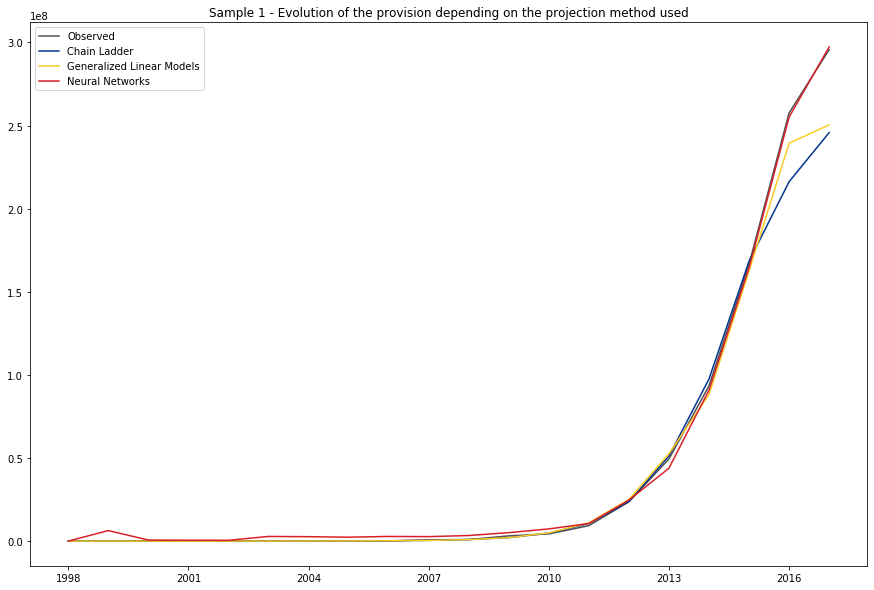

In [231]:
display_provision(Sample1_provisions, model_names
                , title = "Sample 1 - Evolution of the provision depending on the projection method used")

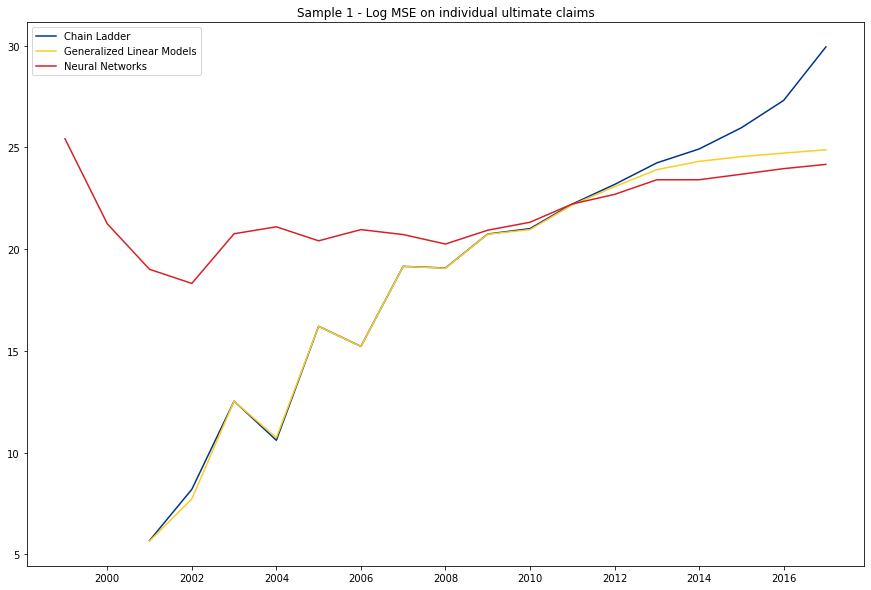

In [232]:
display_individual_mses(Sample1_mses, title = "Sample 1 - Log MSE on individual ultimate claims")

<br>

## 5.2 Sample 2  <a name="five-two"></a> 

We compute the provisions, the MSEs:

In [233]:
Sample2_provisions = {"Observed" : compute_provisions(aggregated_to_triangle(aggregate(Sample2_full, ["Paid"]))),
                      "CL" : compute_provisions(aggregated_to_triangle(aggregate(Sample2_cl_extended, ["Paid"]))),
                      "GLM": compute_provisions(aggregated_to_triangle(aggregate(Sample2_glm_extended, ["Paid"]))),
                      "NN" : compute_provisions(aggregated_to_triangle(aggregate(Sample2_nn_extended, ["Paid"])))
}

Sample2_mses = {
     "CL": np.log(mse_between_ultimates(Sample2_full, Sample2_cl_extended))
    , "GLM" : np.log(mse_between_ultimates(Sample2_full, Sample2_glm_extended))
    , "NN" : np.log(mse_between_ultimates(Sample2_full, Sample2_nn_extended))
}

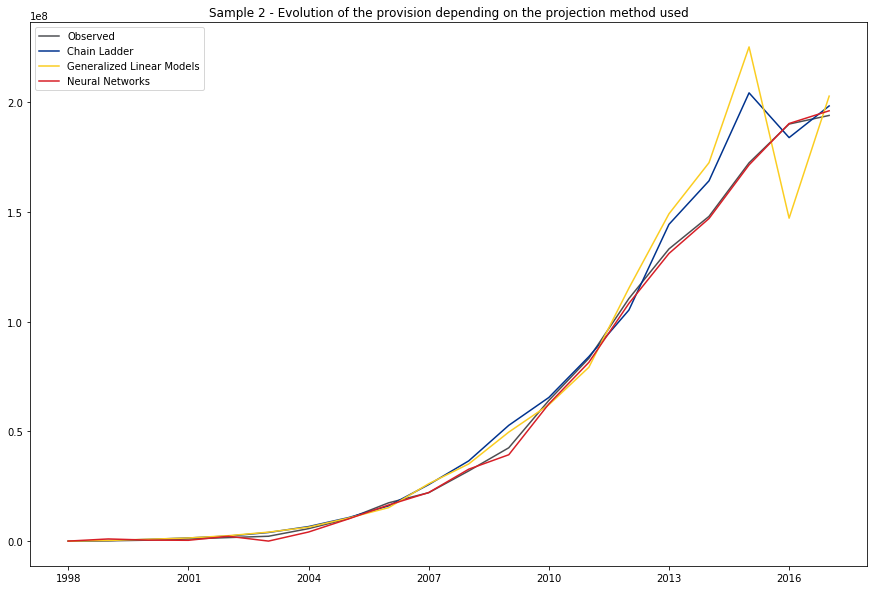

In [234]:
display_provision(Sample2_provisions, model_names
                , title = "Sample 2 - Evolution of the provision depending on the projection method used")

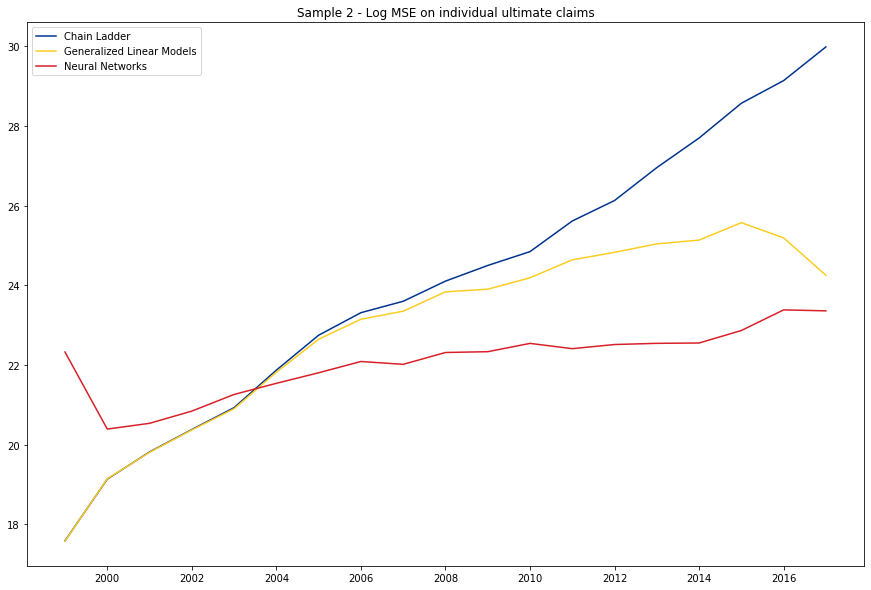

In [235]:
display_individual_mses(Sample2_mses, title = "Sample 2 - Log MSE on individual ultimate claims")

**For Samples 1 and 2**, it seems that for the latest accident years with less development, the NN outperforms the Chain Ladder in terms of prediction at an individual claim level. However, NN predictions could not outperform in terms of overall reserve prediction.

<br>

## 5.3 Sample 3 <a name="five-three"></a> 

We compute the provisions, the MSEs:

In [236]:
Sample3_provisions = {"Observed" : compute_provisions(aggregated_to_triangle(aggregate(Sample3_full, ["Paid"]))),
                      "CL" : compute_provisions(aggregated_to_triangle(aggregate(Sample3_cl_extended, ["Paid"]))),
                      "GLM": compute_provisions(aggregated_to_triangle(aggregate(Sample3_glm_extended, ["Paid"]))),
                      "NN" : compute_provisions(aggregated_to_triangle(aggregate(Sample3_nn_extended, ["Paid"])))
}

Sample3_mses = {
     "CL": np.log(mse_between_ultimates(Sample3_full, Sample3_cl_extended))
    , "GLM" : np.log(mse_between_ultimates(Sample3_full, Sample3_glm_extended))
    , "NN" : np.log(mse_between_ultimates(Sample3_full, Sample3_nn_extended))
}

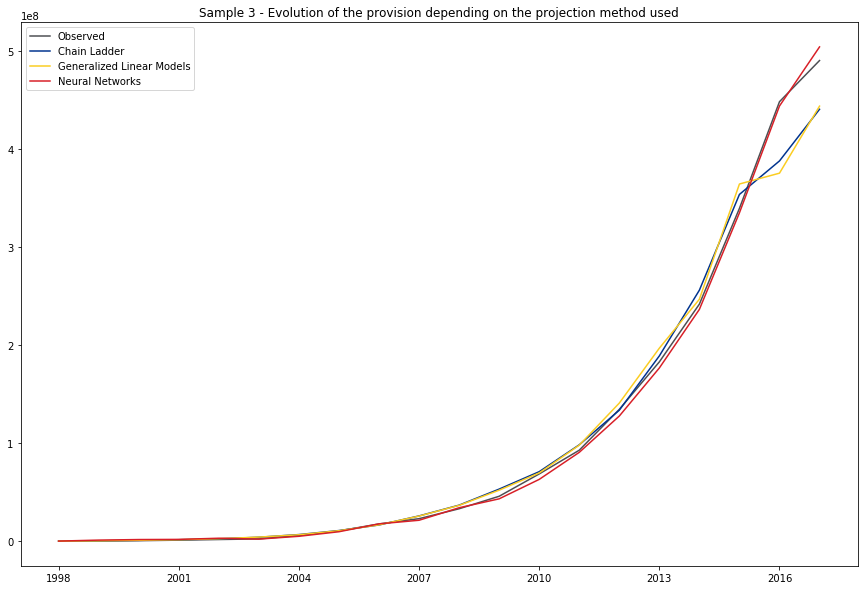

In [237]:
display_provision(Sample3_provisions, model_names
                , title = "Sample 3 - Evolution of the provision depending on the projection method used")

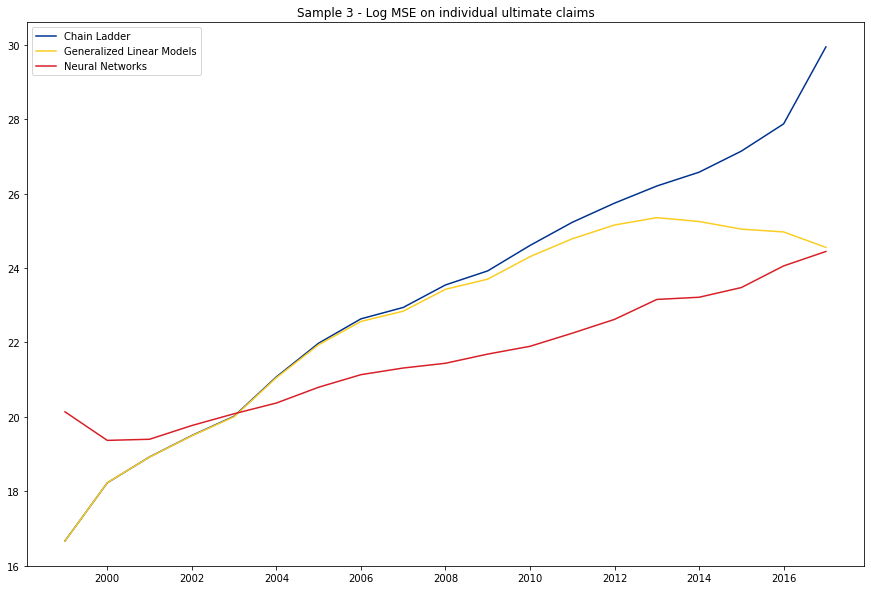

In [238]:
display_individual_mses(Sample3_mses, title = "Sample 3 - Log MSE on individual ultimate claims")

**For Sample3**, which is a mixture of two underlying patterns, the Chain Ladder method estimated reserves very precisely, but on the other hand the method performed badly with the individual claim predictions. Because CL can only estimate one development pattern, one part of the claims predicted by the Chain Ladder is underestimated, while the other part is overestimated. From the results in the previous section, it seems that NNs manage to detect this difference and thus obtain better predictions.

<br>

## 5.4 Sample 4 <a name="five-four"></a>

We compute the provisions, the MSEs:

In [239]:
Sample4_provisions = {"Observed" : compute_provisions(aggregated_to_triangle(aggregate(Sample4_full, ["Paid"]))),
                      "CL" : compute_provisions(aggregated_to_triangle(aggregate(Sample4_cl_extended, ["Paid"]))),
                      "GLM": compute_provisions(aggregated_to_triangle(aggregate(Sample4_glm_extended, ["Paid"]))),
                      "NN" : compute_provisions(aggregated_to_triangle(aggregate(Sample4_nn_extended, ["Paid"])))
}

Sample4_mses = {
     "CL": np.log(mse_between_ultimates(Sample4_full, Sample4_cl_extended))
    , "GLM" : np.log(mse_between_ultimates(Sample4_full, Sample4_glm_extended))
    , "NN" : np.log(mse_between_ultimates(Sample4_full, Sample4_nn_extended))
}

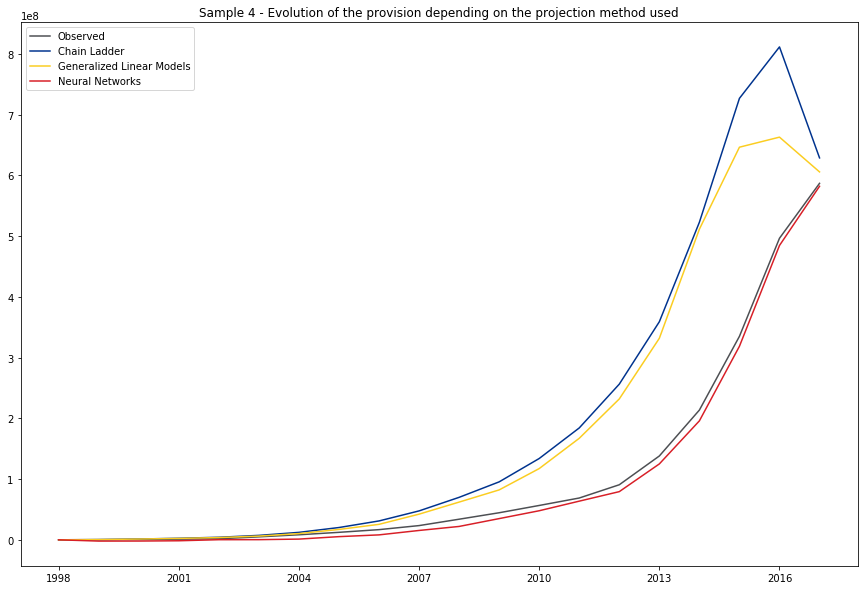

In [240]:
display_provision(Sample4_provisions, model_names
                , title = "Sample 4 - Evolution of the provision depending on the projection method used")

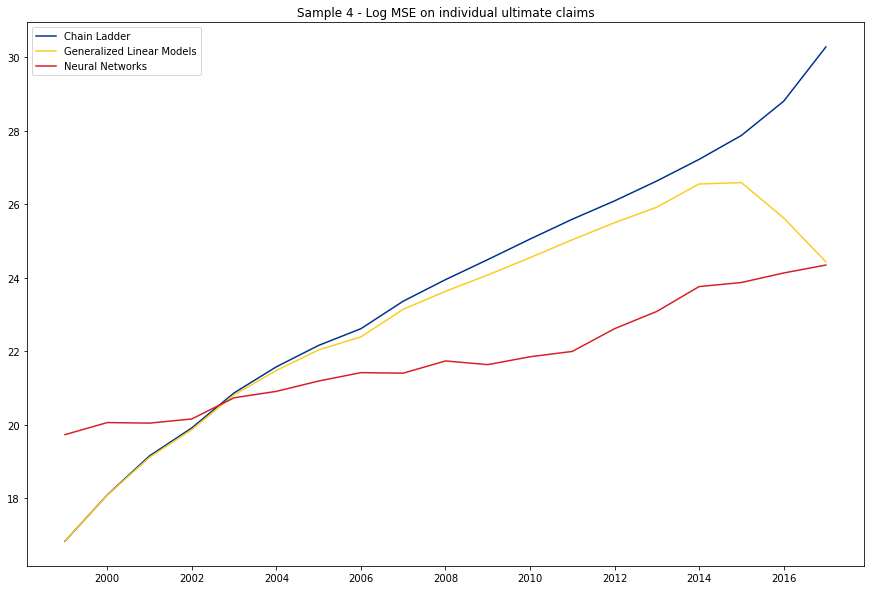

In [241]:
display_individual_mses(Sample4_mses
                        , title = "Sample 4 - Log MSE on individual ultimate claims")

<br>

## 5.5 Sample 5 <a name="five-three"></a>

We compute the provisions, the MSEs:

In [242]:
Sample5_provisions = {"Observed" : compute_provisions(aggregated_to_triangle(aggregate(Sample5_full, ["Paid"]))),
                      "CL" : compute_provisions(aggregated_to_triangle(aggregate(Sample5_cl_extended, ["Paid"]))),
                      "GLM": compute_provisions(aggregated_to_triangle(aggregate(Sample5_glm_extended, ["Paid"]))),
                      "NN" : compute_provisions(aggregated_to_triangle(aggregate(Sample5_nn_extended, ["Paid"])))
}
Sample5_mses = {
     "CL": np.log(mse_between_ultimates(Sample5_full, Sample5_cl_extended))
    , "GLM" : np.log(mse_between_ultimates(Sample5_full, Sample5_glm_extended))
    , "NN" : np.log(mse_between_ultimates(Sample5_full, Sample5_nn_extended))
}

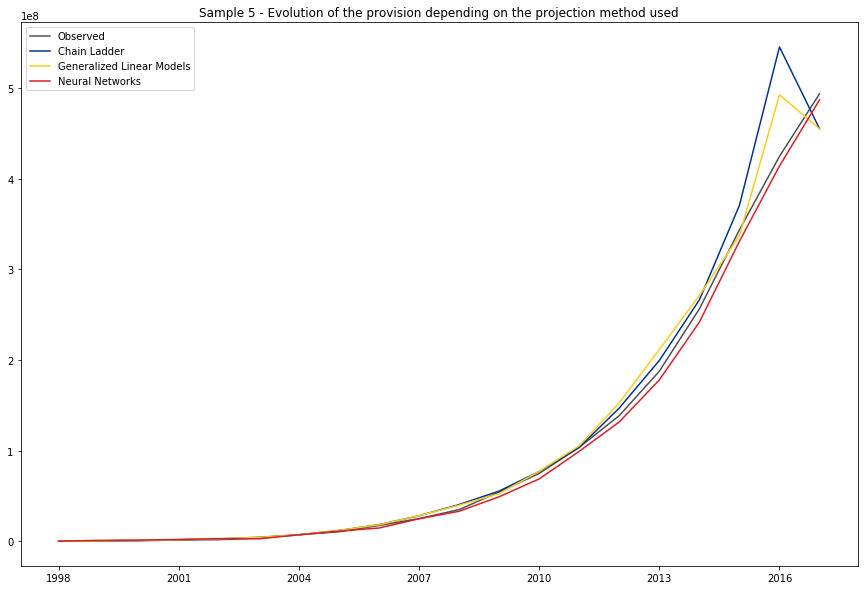

In [243]:
display_provision(Sample5_provisions, model_names
                  , title = "Sample 5 - Evolution of the provision depending on the projection method used")

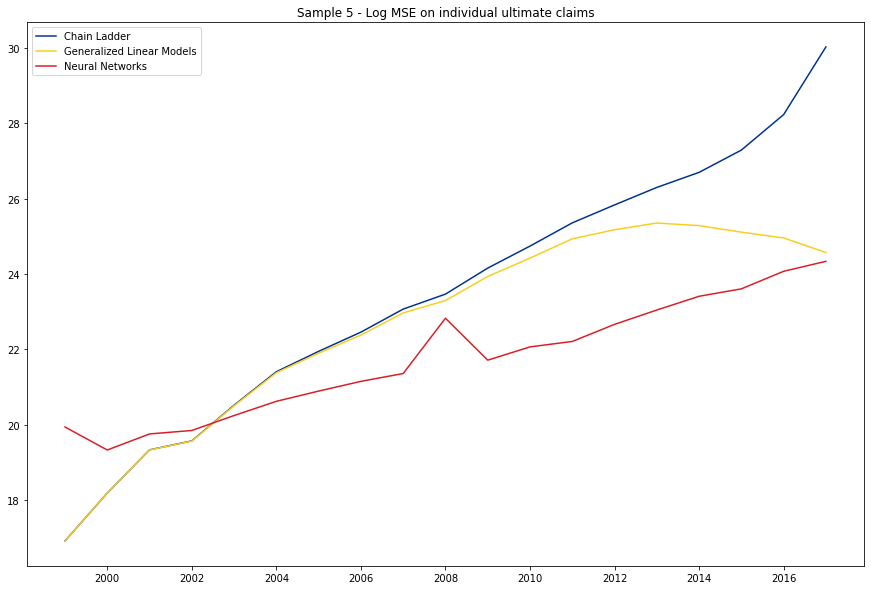

In [244]:
display_individual_mses(Sample5_mses, title = "Sample 5 - Log MSE on individual ultimate claims")

Finally, **in Samples 4 and 5**, Chain Ladder significantly overestimated the provisions as expected.  NN methods give closer predictions, again because they can make the correct segmentation between the claims with a different underlying development pattern. 


<br> <br>
<br> <br>


# Chapter 6 - Conclusion <a name="six"></a>

Our main conclusions after analysing NN methods in comparison with the commonly used Chain Ladder method are the following: 

* For a business line with a constant development over the different accident years, **Chain Ladder is still a very simple and intuitive method, which obtains a good estimate of the total provisions**. In this case, **NNs do not always give better results in the overall sense** but **outperforms the CL method in terms of the error on individual ultimate amounts**.

* In case a business line is not homogeneous in the sense that the development trend is different for individual claims or changing over time, **Neural Networks have the ability to differentiate claims with statistically different underlying patterns**. Moreover on the overall level of provisions, the **NNs are also able to outperform the CL because the underlying assumptions of the CL are not met** (it assumes a stable development over time). 
